# Boston Airbnb Prediction of Listing price

- 1201102251 Sabrina Amalyn Binti Aminur Rizal
- 1201102478 Sarah Shahmina Binti Abdul Ra'uf
- 1211307001 Chan Kah Kei
- 1211307539 Amira Raina Binti Azlan Rahman

Introduction:

Airbnb has revolutionized the way people travel by providing a platform where hosts can offer accommodations ranging from shared rooms to entire properties. However, one of the most challenging aspects for hosts is determining the right price for their listings. Setting a competitive yet profitable price is influenced by various factors such as the property’s geographic location, property type, size, amenities. Hosts often struggle with pricing inconsistencies, which can lead to either underpricing, resulting in lost revenue, or overpricing, leading to reduced booking rates. This project aims to address these issues by predicting the price of Airbnb listings in Boston based on multiple features, offering hosts a data-driven approach to more accurately determine their pricing strategies.


Problem statement:

The challenge of predicting Airbnb listing prices lies in the multitude of factors influencing the price point. Geographic location, property type, amenities offered, and many other variables all play a crucial role in determining how much a property should cost. This variability creates difficulty for hosts in identifying the optimal price for their listings. Understanding the dynamics behind these factors can aid in reducing pricing errors and improve the booking rate and revenue for hosts.

​Objectives:
- Build a regression model to predict the price of Airbnb listings.​
- Identify significant features that impact the price of a listing.​
- Achieve a high level of accuracy in predicting listing prices to minimize underpricing or overpricing errors.​


​

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Show all columns

# Data Preprocessing

In this section of the notebook, we will be cleaning the 'listings' dataset. The list of data cleaning activities performed are listed below:
- Selecting relevant features to our problem statement and objective
- Changing datatypes of the price column from string to float and instant_bookable 
- One-hot-encoding the amenities column
- Checking for Null values in the columns and filling in nulls by deducing the value from other available columns, or removing the record completely
- Creating the new bool column  "has_public_transportation" based on the "transit" column
- Creating the new categorical column "room_size" by using running the "space" column on the bart-large-mnli NLP which performs zero-shot classification for the labels small, medium, large





In [23]:
# Load the listings data for cleaning purposes
listings = pd.read_csv('listings.csv')

listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [25]:
# Listings selected that are relevant for analysis

listings_selected = listings[
    [
        'id',
        'summary',
        'space',
        'neighbourhood_cleansed',
        'latitude',
        'longitude',
        'property_type',
        'transit',
        'room_type',
        'accommodates',
        'bathrooms',
        'bedrooms',
        'beds',
        'bed_type',
        'amenities',
        'price',
        'minimum_nights',
        'maximum_nights',
        'availability_365',
        'cancellation_policy',
        'instant_bookable',
    ]
]

listings_selected



,id,summary,space,neighbourhood_cleansed,latitude,longitude,property_type,transit,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,availability_365,cancellation_policy,instant_bookable
0,12147973,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,Roslindale,42.282619,-71.133068,House,"The bus stop is 2 blocks away, and frequent. B...",Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,2,1125,0,moderate,f
1,3075044,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Roslindale,42.286241,-71.134374,Apartment,Plenty of safe street parking. Bus stops a few...,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,2,15,359,moderate,t
2,6976,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",Roslindale,42.292438,-71.135765,Apartment,"PUBLIC TRANSPORTATION: From the house, quick p...",Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,3,45,319,moderate,f
3,1436513,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Roslindale,42.281106,-71.121021,House,There are buses that stop right in front of th...,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,1,1125,98,moderate,f
4,7651065,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",Roslindale,42.284512,-71.136258,House,From Logan Airport and South Station you have...,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,2,31,334,flexible,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,5 min walking to Orange Line subway with 2 sto...,NaN,Charlestown,42.380968,-71.083795,Apartment,NaN,Private room,3,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$69.00,2,1125,356,strict,t
3581,14844274,"Most popular apartment in BU, best located in ...",Best location in BU,Allston,42.347503,-71.118336,Apartment,"There is green line, BU shuttle in front of th...",Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$150.00,3,365,364,strict,f
3582,14585486,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Charlestown,42.371771,-71.071300,Apartment,"Public transport is 5 minuts away, but walking...",Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{""translation missing: en.hosting_amenity_49"",...",$198.00,3,12,40,flexible,f
3583,14603878,"My place is close to Taco Loco Mexican Grill, ...",NaN,Charlestown,42.385226,-71.080923,Apartment,NaN,Private room,2,1.0,1.0,1.0,Real Bed,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye...",$65.00,1,13,253,strict,f


In [26]:
listings_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   summary                 3442 non-null   object 
 2   space                   2528 non-null   object 
 3   neighbourhood_cleansed  3585 non-null   object 
 4   latitude                3585 non-null   float64
 5   longitude               3585 non-null   float64
 6   property_type           3582 non-null   object 
 7   transit                 2295 non-null   object 
 8   room_type               3585 non-null   object 
 9   accommodates            3585 non-null   int64  
 10  bathrooms               3571 non-null   float64
 11  bedrooms                3575 non-null   float64
 12  beds                    3576 non-null   float64
 13  bed_type                3585 non-null   object 
 14  amenities               3585 non-null   

In [27]:
# Count the number of nulls in the columns:

# Count null values in each column
null_counts = listings_selected.isnull().sum()

# Display columns with their corresponding null counts
print(null_counts)



id                           0
summary                    143
space                     1057
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                3
transit                   1290
room_type                    0
accommodates                 0
bathrooms                   14
bedrooms                    10
beds                         9
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
availability_365             0
cancellation_policy          0
instant_bookable             0
dtype: int64


In [28]:
# Check num of unique values

for columns in listings_selected:
    unique_values_count = listings_selected[columns].nunique()
    print(columns, ":", unique_values_count)

id : 3585
summary : 3113
space : 2268
neighbourhood_cleansed : 25
latitude : 3585
longitude : 3585
property_type : 13
transit : 1859
room_type : 3
accommodates : 14
bathrooms : 12
bedrooms : 6
beds : 11
bed_type : 5
amenities : 3092
price : 324
minimum_nights : 29
maximum_nights : 85
availability_365 : 348
cancellation_policy : 4
instant_bookable : 2


In [29]:
# For each column, if the number of unique values is less than or equal to 178, print the unique values
for column in listings_selected:
    unique_values_count = listings_selected[column].nunique()
    
    if unique_values_count <= 178:
        unique_values = listings_selected[column].unique()  # Get all unique values
        print(f"Column: {column}")
        print(f"Unique Values Count: {unique_values_count}")
        print(f"Unique Values: {unique_values}\n")

Column: neighbourhood_cleansed
Unique Values Count: 25
Unique Values: ['Roslindale' 'Jamaica Plain' 'Mission Hill' 'Longwood Medical Area'
 'Bay Village' 'Leather District' 'Chinatown' 'North End' 'Roxbury'
 'South End' 'Back Bay' 'East Boston' 'Charlestown' 'West End'
 'Beacon Hill' 'Downtown' 'Fenway' 'Brighton' 'West Roxbury' 'Hyde Park'
 'Mattapan' 'Dorchester' 'South Boston Waterfront' 'South Boston'
 'Allston']

Column: property_type
Unique Values Count: 13
Unique Values: ['House' 'Apartment' 'Condominium' 'Villa' 'Bed & Breakfast' 'Townhouse'
 'Entire Floor' 'Loft' 'Guesthouse' 'Boat' 'Dorm' 'Other' nan 'Camper/RV']

Column: room_type
Unique Values Count: 3
Unique Values: ['Entire home/apt' 'Private room' 'Shared room']

Column: accommodates
Unique Values Count: 14
Unique Values: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]

Column: bathrooms
Unique Values Count: 12
Unique Values: [1.5 1.  2.  0.  2.5 3.5 nan 3.  0.5 4.5 4.  5.  6. ]

Column: bedrooms
Unique Values Count: 6
Uniqu

## Datatype changing/one-hot-encoding/Creating has_public_transportation

In [30]:
# Price related column, remove $ and convert to float

listings_selected['price'] = listings_selected['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert instant bookable to 0, 1
listings_selected['instant_bookable'] = listings_selected['instant_bookable'].map({'f': 0, 't': 1})

listings_selected.head()


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\3341228530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected['price'] = listings_selected['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\3341228530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected['instant_bookable'] = listings_selected['instant_bookable'].map({'f': 0, 't': 1})


,id,summary,space,neighbourhood_cleansed,latitude,longitude,property_type,transit,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,availability_365,cancellation_policy,instant_bookable
0,12147973,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,Roslindale,42.282619,-71.133068,House,"The bus stop is 2 blocks away, and frequent. B...",Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,2,1125,0,moderate,0
1,3075044,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Roslindale,42.286241,-71.134374,Apartment,Plenty of safe street parking. Bus stops a few...,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,2,15,359,moderate,1
2,6976,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",Roslindale,42.292438,-71.135765,Apartment,"PUBLIC TRANSPORTATION: From the house, quick p...",Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,3,45,319,moderate,0
3,1436513,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Roslindale,42.281106,-71.121021,House,There are buses that stop right in front of th...,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,1,1125,98,moderate,0
4,7651065,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",Roslindale,42.284512,-71.136258,House,From Logan Airport and South Station you have...,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,2,31,334,flexible,0


In [31]:
#One hot encode the amentities column:

# Clean and normalize the `amenities` column
listings_selected['amenities'] = (
    listings_selected['amenities']
    .str.replace(r"translation missing: [^,}]*", "", regex=True)  # Remove translation missing entries
    .str.strip('{}')  # Remove curly braces
    .str.replace('"', '')  # Remove quotation marks
)


# Split the amenities into lists
listings_selected['amenities_list'] = listings_selected['amenities'].str.split(',')

# Get all unique amenities
unique_amenities = set(amenity for sublist in listings_selected['amenities_list'] for amenity in sublist)

# One-hot encode the amenities
for amenity in unique_amenities:
    listings_selected[amenity] = listings_selected['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

# Drop the intermediate list column if not needed
listings_selected.drop(columns=['amenities_list', ''], inplace=True)

# Display the one-hot encoded DataFrame
listings_selected.head()


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\2190566009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected['amenities'] = (
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\2190566009.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected['amenities_list'] = listings_selected['amenities'].str.split(',')
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\2190566009.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,id,summary,space,neighbourhood_cleansed,latitude,longitude,property_type,transit,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,availability_365,cancellation_policy,instant_bookable,Family/Kid Friendly,Paid Parking Off Premises,Doorman,Cat(s),Lock on Bedroom Door,Iron,Internet,Shampoo,Wireless Internet,Wheelchair Accessible,Hot Tub,Free Parking on Street,First Aid Kit,TV,Safety Card,Other pet(s),Elevator in Building,Dryer,Indoor Fireplace,Pool,Washer / Dryer,Hangers,Heating,Hair Dryer,Pets Allowed,Washer,Breakfast,Cable TV,Fire Extinguisher,Free Parking on Premises,Air Conditioning,Pets live on this property,Smoking Allowed,Laptop Friendly Workspace,Smoke Detector,Essentials,Gym,Buzzer/Wireless Intercom,Kitchen,Suitable for Events,Dog(s),24-Hour Check-in,Carbon Monoxide Detector
0,12147973,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,Roslindale,42.282619,-71.133068,House,"The bus stop is 2 blocks away, and frequent. B...",Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,2,1125,0,moderate,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,0,0
1,3075044,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Roslindale,42.286241,-71.134374,Apartment,Plenty of safe street parking. Bus stops a few...,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",65.0,2,15,359,moderate,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1
2,6976,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",Roslindale,42.292438,-71.135765,Apartment,"PUBLIC TRANSPORTATION: From the house, quick p...",Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air Conditioning...",65.0,3,45,319,moderate,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1
3,1436513,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Roslindale,42.281106,-71.121021,House,There are buses that stop right in front of th...,Private room,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",75.0,1,1125,98,moderate,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,0,0,0,1
4,7651065,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",Roslindale,42.284512,-71.136258,House,From Logan Airport and South Station you have...,Private room,2,1.5,1.0,2.0,Real Bed,"Internet,Wireless Internet,Air Conditioning,Ki...",79.0,2,31,334,flexible,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1


In [32]:
# Check if there is public transportation, and create a new boolean column based on the transit column

# Function to determine if the listing has public transportation
def check_public_transportation(transit_info):
    # If there is any non-empty value in transit_info, set as True
    if pd.isna(transit_info) or transit_info == '':        
        return 0
    return 1

# Apply the function to create the 'has_public_transportation' column
listings_selected['has_public_transportation'] = listings_selected['transit'].apply(check_public_transportation)

# Display the first few rows
listings_selected.head()



C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\701455581.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected['has_public_transportation'] = listings_selected['transit'].apply(check_public_transportation)


,id,summary,space,neighbourhood_cleansed,latitude,longitude,property_type,transit,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,availability_365,cancellation_policy,instant_bookable,Family/Kid Friendly,Paid Parking Off Premises,Doorman,Cat(s),Lock on Bedroom Door,Iron,Internet,Shampoo,Wireless Internet,Wheelchair Accessible,Hot Tub,Free Parking on Street,First Aid Kit,TV,Safety Card,Other pet(s),Elevator in Building,Dryer,Indoor Fireplace,Pool,Washer / Dryer,Hangers,Heating,Hair Dryer,Pets Allowed,Washer,Breakfast,Cable TV,Fire Extinguisher,Free Parking on Premises,Air Conditioning,Pets live on this property,Smoking Allowed,Laptop Friendly Workspace,Smoke Detector,Essentials,Gym,Buzzer/Wireless Intercom,Kitchen,Suitable for Events,Dog(s),24-Hour Check-in,Carbon Monoxide Detector,has_public_transportation
0,12147973,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,Roslindale,42.282619,-71.133068,House,"The bus stop is 2 blocks away, and frequent. B...",Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,2,1125,0,moderate,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,0,0,1
1,3075044,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Roslindale,42.286241,-71.134374,Apartment,Plenty of safe street parking. Bus stops a few...,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",65.0,2,15,359,moderate,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1
2,6976,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",Roslindale,42.292438,-71.135765,Apartment,"PUBLIC TRANSPORTATION: From the house, quick p...",Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air Conditioning...",65.0,3,45,319,moderate,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1
3,1436513,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Roslindale,42.281106,-71.121021,House,There are buses that stop right in front of th...,Private room,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",75.0,1,1125,98,moderate,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1
4,7651065,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",Roslindale,42.284512,-71.136258,House,From Logan Airport and South Station you have...,Private room,2,1.5,1.0,2.0,Real Bed,"Internet,Wireless Internet,Air Conditioning,Ki...",79.0,2,31,334,flexible,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1


In [33]:
# Count the number of False values in 'has_public_transportation'
false_count = (listings_selected['has_public_transportation'] == 0).sum()

# Display the result (should be 1290)
print(false_count)


1290


## Filling in missing values for property_type, beds, bathrooms and bedrooms

In [34]:
# For the propery column, check the rows that have NA, 

listings.loc[listings['property_type'].isna()]



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1321,7731797,https://www.airbnb.com/rooms/7731797,20160906204935,2016-09-07,Classy Studio in Historic Back Bay,This polished studio in the heart of Boston’s ...,When you walk through the front door of this F...,This polished studio in the heart of Boston’s ...,none,Right downstairs you’ll find Newbury Street bu...,• Please be aware that this is a 4th floor wal...,Parking can be difficult in this area. If you’...,NaN,Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/40263cae-7...,https://a2.muscache.com/im/pictures/40263cae-7...,https://a2.muscache.com/im/pictures/40263cae-7...,https://a2.muscache.com/im/pictures/40263cae-7...,12243051,https://www.airbnb.com/users/show/12243051,Flatbook,2014-02-14,"Montreal, Quebec, Canada",We think a great trip starts with a 5-star hos...,within a few hours,71%,98%,f,https://a2.muscache.com/im/pictures/50576553-3...,https://a2.muscache.com/im/pictures/50576553-3...,Gay Village,363,363,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Newbury Street, Boston, MA 02116, United States",Back Bay,Back Bay,NaN,Boston,MA,02116,Boston,"Boston, MA",US,United States,42.349350,-71.082488,t,NaN,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$199.00,NaN,NaN,$300.00,$75.00,2,$10.00,3,1125,today,NaN,16,32,59,105,2016-09-06,26,2015-09-13,2016-08-21,85.0,9.0,9.0,9.0,9.0,10.0,9.0,f,NaN,NaN,t,strict,f,f,58,2.16
2061,14122467,https://www.airbnb.com/rooms/14122467,20160906204935,2016-09-07,Hotel room in Downtown Boston - amazing location!,This is a room in a 4-star hotel located in Do...,NaN,This is a room in a 4-star hotel located in Do...,none,NaN,NaN,NaN,NaN,NaN,- Handicap Accessible - Additional information...,https://a2.muscache.com/im/pictures/5cf6a763-3...,https://a2.muscache.com/im/pictures/5cf6a763-3...,https://a2.muscache.com/im/pictures/5cf6a763-3...,https://a2.muscache.com/im/pictures/5cf6a763-3...,32088178,https://www.airbnb.com/users/show/32088178,Christine,2015-04-27,"Cambridge, Massachusetts, United States",NaN,NaN,NaN,NaN,f,https://a1.muscache.com/im/users/32088178/prof...,https://a1.muscache.com/im/users/32088178/prof...,Downtown Crossing,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Devonshire Street, Boston, MA 02110, United St...",Downtown Crossing,Downtown,NaN,Boston,MA,02110,Boston,"Boston, MA",US,United States,42.355444,-71.057985,t,NaN,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",""Wh...",NaN,$190.00,NaN,NaN,Na

In [35]:
# For id=7731797, we can deduce that the property type is an apartment. Replace the NA value with 'Apartment'

listings_selected.loc[listings_selected['id']==7731797, 'property_type']='Apartment'

# For id=10758, we can deduce that the property type is a Guest House. Replace the NA value with 'Guesthouse'

listings_selected.loc[listings_selected['id']==10758, 'property_type']='Guesthouse'

# For id=14122467, we can deduce that the property type is a Hotel room. Replace the NA value with 'Other', change the room_type to 'Private room'

listings_selected.loc[listings_selected['id']==14122467, 'property_type']='Other'
listings_selected.loc[listings_selected['id']==14122467, 'room_type']='Private room'



In [36]:
# For the beds column, check the rows that have NA, 
listings.loc[listings['beds'].isna()]


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
494,14336348,https://www.airbnb.com/rooms/14336348,20160906204935,2016-09-07,4 minutes walk to the Longwood Medical Area.,My place is close to The Longwood Medical Area...,It's a 2 BR 1 Bathroom apartment located at th...,My place is close to The Longwood Medical Area...,none,"The neighborhood is quite and clean, there are...","If you smoke, do it in the balcony please beca...","The train is walking distance, green line 3 mi...","Guests can you the bedroom, kitchen, living ro...",I will be in Boston and willing to help you wi...,NaN,https://a2.muscache.com/im/pictures/5e15f206-f...,https://a2.muscache.com/im/pictures/5e15f206-f...,https://a2.muscache.com/im/pictures/5e15f206-f...,https://a2.muscache.com/im/pictures/5e15f206-f...,30679372,https://www.airbnb.com/users/show/30679372,Khaled,2015-04-06,"Boston, Massachusetts, United States","I'm a graduate student at NEU, i've been livin...",within a day,100%,67%,f,https://a2.muscache.com/im/users/30679372/prof...,https://a2.muscache.com/im/users/30679372/prof...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Boston, MA, United States",NaN,Mission Hill,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.333072,-71.101286,f,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,"{""Wireless Internet"",""Air Conditioning"",Kitche...",NaN,$99.00,NaN,NaN,NaN,NaN,1,$50.00,2,23,3 weeks ago,NaN,0,0,23,23,2016-09-06,1,2016-08-22,2016-08-22,100.0,10.0,10.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,moderate,f,f,1,1.00
755,1426754,https://www.airbnb.com/rooms/1426754,20160906204935,2016-09-07,Boston Best furnished Studio (H2a),NaN,"Studio in excellent location, 2nd floor walk u...","Studio in excellent location, 2nd floor walk u...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/21271505/d...,https://a0.muscache.com/im/pictures/21271505/d...,https://a0.muscache.com/im/pictures/21271505/d...,https://a0.muscache.com/im/pictures/21271505/d...,5578043,https://www.airbnb.com/users/show/5578043,Dror,2013-03-22,"New York, New York, United States",Harvard University graduate Masters in Psychol...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/5578043/profi...,https://a2.muscache.com/im/users/5578043/profi...,North End,11,11,"['email', 'phone', 'reviews']",t,f,"Hanover Street, Boston, MA 02108, United States",North End,North End,NaN,Boston,MA,02108,Boston,"Boston, MA",US,United States,42.364824,-71.053707,t,Apartment,Entire home/apt,2,NaN,1.0,NaN,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$99.00,NaN,"$3,270.00",$300.00,$75.00,1,$0.00,1,365,4 days ag

In [37]:
# For id=14336348, we can deduce that the num of beds is 1.0. Replace the NA value with 1.0

listings_selected.loc[listings_selected['id']==14336348, 'beds']=1.0

# For id=10758, we can deduce that the property type is a Guest House. Replace the NA value with 'Guesthouse'

listings_selected.loc[listings_selected['id']==1426754, 'beds']= 1.0

# For id=12627225, we cannot deduce the num of beds. Remove this listing from the dataset

listings_selected.drop(listings_selected[listings_selected['id']==12627225].index, inplace=True)

# For id=12857811, we cannot deduce the num of beds. Remove this listing from the dataset
listings_selected.drop(listings_selected[listings_selected['id']==12857811].index, inplace=True)

# For id=8152796, we cannot deduce the num of beds. Remove this listing from the dataset
listings_selected.drop(listings_selected[listings_selected['id']==8152796].index, inplace=True)

# For id=12796808, we cannot deduce the num of beds. Remove this listing from the dataset
listings_selected.drop(listings_selected[listings_selected['id']==12796808].index, inplace=True)



# For id=9239190, we cannot deduce the num of beds. Remove this listing from the dataset
listings_selected.drop(listings_selected[listings_selected['id']==9239190].index, inplace=True)


# For id=12857981, we cannot deduce the num of beds. Remove this listing from the dataset
listings_selected.drop(listings_selected[listings_selected['id']==12857981].index, inplace=True)


# For id=14604429, we cannot deduce the num of beds. Remove this listing from the dataset
listings_selected.drop(listings_selected[listings_selected['id']==14604429].index, inplace=True)



C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\373251345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected.drop(listings_selected[listings_selected['id']==12627225].index, inplace=True)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\373251345.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected.drop(listings_selected[listings_selected['id']==12857811].index, inplace=True)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\373251345.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [38]:
# For the bathrooms column, check the rows that have NA, 
listings_selected.loc[listings_selected['bathrooms'].isna()]


,id,summary,space,neighbourhood_cleansed,latitude,longitude,property_type,transit,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,availability_365,cancellation_policy,instant_bookable,Family/Kid Friendly,Paid Parking Off Premises,Doorman,Cat(s),Lock on Bedroom Door,Iron,Internet,Shampoo,Wireless Internet,Wheelchair Accessible,Hot Tub,Free Parking on Street,First Aid Kit,TV,Safety Card,Other pet(s),Elevator in Building,Dryer,Indoor Fireplace,Pool,Washer / Dryer,Hangers,Heating,Hair Dryer,Pets Allowed,Washer,Breakfast,Cable TV,Fire Extinguisher,Free Parking on Premises,Air Conditioning,Pets live on this property,Smoking Allowed,Laptop Friendly Workspace,Smoke Detector,Essentials,Gym,Buzzer/Wireless Intercom,Kitchen,Suitable for Events,Dog(s),24-Hour Check-in,Carbon Monoxide Detector,has_public_transportation
103,777903,NaN,My wife and i are empy nesters who enjoy meeti...,Jamaica Plain,42.307574,-71.134630,House,It is a 20 minute to Jamaica Plain Center wher...,Private room,2,NaN,1.0,1.0,Real Bed,"Internet,Wireless Internet,Air Conditioning,Fr...",85.0,1,1125,361,moderate,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
630,822063,NaN,If you are looking for an affordable place to ...,North End,42.364429,-71.056017,Apartment,NaN,Shared room,1,NaN,1.0,1.0,Real Bed,,35.0,1,1125,4,flexible,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
755,1426754,NaN,"Studio in excellent location, 2nd floor walk u...",North End,42.364824,-71.053707,Apartment,NaN,Entire home/apt,2,NaN,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",99.0,1,365,300,strict,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0
800,276450,NaN,"The unit includes internet, cable, and central...",Roxbury,42.338140,-71.080008,Apartment,NaN,Entire home/apt,4,NaN,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",167.0,2,1125,328,strict,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
888,658029,NaN,This is a 1 bed 1 bath unit in Boston's South ...,Roxbury,42.339233,-71.081413,Apartment,NaN,Entire home/apt,4,NaN,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",163.0,2,1125,284,strict,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
989,225224,NaN,This room is not rented out normally but is us...,South End,42.346428,-71.075030,House,NaN,Private room,1,NaN,1.0,1.0,Real Bed,"Cable TV,Internet,Wireless Internet,Air Condit...",98.0,1,365,329,moderate,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1120,22354,NaN,"THIS IS A 4 STORY 19TH CENTURY TOWNHOUSE, 2 BL...",South End,42.344957,-71.074857,Bed & Breakfast,NaN,Private room,1,NaN,1.0,1.0,Real Bed,"Internet,Wireless Internet,Air Conditioning,He...",135.0,1,90,336,moderate,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2196,67946,NaN,The minute you step through the door to these ...,Fenway,42.345009,-71.098724,Apartment,NaN,Private room,3,NaN,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Air Conditioning,Wheelcha...",249.0,3,730,364,super_strict_30,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2201,25142,NaN,PROPERTY AMENITIES: New building 17 floor Hi-...,Fenway,42.344865,-71.102600,Apartment,NaN,Entire home/apt,4,NaN,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Air Conditioning,Wheelcha...",349.0,3,730,364,super_strict_30,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0
2785,1391215,"I'm working professional woman, originally fro...",Dorchester is a historic neighborhood of over ...,Dorchester,42.298011,-71.058447,House,Important information please fallow strictly: ...,Private room,2,NaN,1.0,1.0,Real Bed,"Cable TV,Internet,Wireless Internet,Kitchen,Fr...",50.0,2,1125

In [39]:
# Repeat the same data cleaning process for the bathrooms column
listings_selected.loc[listings_selected['id']==777903, 'bathrooms']=1.0


listings_selected.loc[listings_selected['id']==822063, 'bathrooms']=1.0



listings_selected.loc[listings_selected['id']==1426754, 'bathrooms']=1.0


listings_selected.drop(listings_selected[listings_selected['id']==276450].index, inplace=True)


listings_selected.loc[listings_selected['id']==658029, 'bathrooms']=1.0


listings_selected.drop(listings_selected[listings_selected['id']==225224].index, inplace=True)

listings_selected.loc[listings_selected['id']==22354, 'bathrooms']=1.0

listings_selected.drop(listings_selected[listings_selected['id']==67946].index, inplace=True)

listings_selected.drop(listings_selected[listings_selected['id']==25142].index, inplace=True)

listings_selected.drop(listings_selected[listings_selected['id']==1391215].index, inplace=True)


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\591245799.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected.drop(listings_selected[listings_selected['id']==276450].index, inplace=True)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\591245799.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected.drop(listings_selected[listings_selected['id']==225224].index, inplace=True)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\591245799.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [40]:
# For the bedrooms column, check the rows that have NA, 
listings_selected.loc[listings_selected['bedrooms'].isna()]

,id,summary,space,neighbourhood_cleansed,latitude,longitude,property_type,transit,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,maximum_nights,availability_365,cancellation_policy,instant_bookable,Family/Kid Friendly,Paid Parking Off Premises,Doorman,Cat(s),Lock on Bedroom Door,Iron,Internet,Shampoo,Wireless Internet,Wheelchair Accessible,Hot Tub,Free Parking on Street,First Aid Kit,TV,Safety Card,Other pet(s),Elevator in Building,Dryer,Indoor Fireplace,Pool,Washer / Dryer,Hangers,Heating,Hair Dryer,Pets Allowed,Washer,Breakfast,Cable TV,Fire Extinguisher,Free Parking on Premises,Air Conditioning,Pets live on this property,Smoking Allowed,Laptop Friendly Workspace,Smoke Detector,Essentials,Gym,Buzzer/Wireless Intercom,Kitchen,Suitable for Events,Dog(s),24-Hour Check-in,Carbon Monoxide Detector,has_public_transportation
918,1077105,NaN,On restaurant row in Boston's Historic South E...,South End,42.340215,-71.074998,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,,176.0,1,1125,248,flexible,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
920,9765,NaN,Price Quoted is for rentals under 7 nights. ...,South End,42.342594,-71.079421,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",229.0,2,120,362,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
924,1044307,NaN,Price Quoted is for rentals under 7 nights. Di...,South End,42.343363,-71.078039,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",275.0,3,730,362,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1095,1119740,NaN,Live in the fashionable South End where small ...,South End,42.343454,-71.079661,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",186.0,3,365,357,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1117,1071144,NaN,Live in the fashionable South End where small ...,South End,42.341797,-71.078195,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",269.0,3,365,357,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1132,22208,NaN,Live in the fashionable South End where small ...,South End,42.343210,-71.077760,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air Con...",225.0,3,365,357,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1251,9824,Amazing little brownstone building one-half bl...,Relax in a quiet brownstone nestled quietly be...,Back Bay,42.349496,-71.085954,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"Cable TV,Internet,Wireless Internet,Air Condit...",209.0,2,365,323,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1366,1372816,NaN,Relax in a quiet brownstone nestled quietly be...,Back Bay,42.348631,-71.085257,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"TV,Cable TV,Internet,Air Conditioning,Kitchen,...",209.0,2,120,328,super_strict_30,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1419,754845,NaN,Relax in a quiet brownstone nestled quietly be...,Back Bay,42.348317,-71.084743,Apartment,NaN,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"Cable TV,Internet,Wireless Internet,Air Condit...",209.0,2,120,322,super_strict_30,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1959,23619,"New bed frame, new desk and new sofa chair (up...",Our home is located next to the historic State...,Beacon Hill,42.358460,-71.063270,Apartment,Hop on a train at Park T/Green or Red line sta...,Entire home/apt,2,1.0,NaN

In [41]:
# Repeat the same data cleaning process for the bedrooms column
listings_selected.loc[listings_selected['id']==1077105, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==9765, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==9765, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==1044307, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==1119740, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==1071144, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==22208, 'bedrooms']=1.0


listings_selected.loc[listings_selected['id']==9824, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==1372816, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==754845, 'bedrooms']=1.0

listings_selected.loc[listings_selected['id']==23619, 'bedrooms']=1.0




## Running NLP and creating the room_size column 

In this section, we use facebook's zero-shot classification model called bart-large-mnli to classify the "space" column which contains textual description of the space of the room, into groups 'small', 'medium' and 'large'. The method uses the pre-trained BART model's ability to generalize and infer context for classification tasks.

- Warning: The model takes 5 hours to run on the dataset. Do not run the cell where model training happens. We have already provided the csv 'listings_selected_cleaned' which includes the result of running the model.

In [42]:
listings_selected['space_cleaned'] = listings_selected['space'].fillna(listings_selected['summary'])


print("Number of nulls for space:", listings_selected['space_cleaned'].isnull().sum())

listings_selected[['space', 'summary', 'space_cleaned']]

Number of nulls for space: 0


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\1316416900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_selected['space_cleaned'] = listings_selected['space'].fillna(listings_selected['summary'])


,space,summary,space_cleaned
0,The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...
1,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...
2,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ..."
3,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Most places you find in Boston are small howev...
4,"Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro..."
...,...,...,...
3580,NaN,5 min walking to Orange Line subway with 2 sto...,5 min walking to Orange Line subway with 2 sto...
3581,Best location in BU,"Most popular apartment in BU, best located in ...",Best location in BU
3582,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...
3583,NaN,"My place is close to Taco Loco Mexican Grill, ...","My place is close to Taco Loco Mexican Grill, ..."


In [ ]:
# from transformers import pipeline
# from tqdm import tqdm

# # Load the zero-shot classification pipeline
# classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# # Define candidate labels
# candidate_labels = ["Small", "Medium", "Large"]

# # Apply zero-shot classification in batches
# def classify_zero_shot_batch(descriptions):
#     # Process multiple descriptions at once
#     results = classifier(descriptions, candidate_labels)
#     return [result['labels'][0] for result in results]  # Get the highest-scoring labels for each description

# # Apply batch processing with a progress bar
# batch_size = 16  # Adjust the batch size based on your available memory
# descriptions = listings_selected['space_cleaned'].fillna("").tolist()

# # Use tqdm to track progress of batches
# room_size_predictions = []
# for i in tqdm(range(0, len(descriptions), batch_size)):
#     batch = descriptions[i:i + batch_size]
#     room_size_predictions.extend(classify_zero_shot_batch(batch))

# listings_selected['room_size'] = room_size_predictions

# # Display the resulting columns
# print(listings_selected[['space_cleaned', 'room_size']])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.
Device set to use 0
100%|██████████| 224/224 [4:59:13<00:00, 80.15s/it]   
C:\Use

In [24]:
# Export the listings_selected df to a csv file for checkpointing

listings_selected.to_csv('listings_selected_cleaned_2.csv', index=False) 



In [ ]:
# Count the number of nulls in the columns:

pd.set_option('display.max_rows', None)

# Count null values in each column
null_counts = listings_selected.isnull().sum()

# Display columns with their corresponding null counts
print(null_counts)

pd.reset_option('display.max_rows')

id                               0
summary                        139
space                         1054
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
transit                       1283
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
amenities                        0
price                            0
minimum_nights                   0
maximum_nights                   0
availability_365                 0
cancellation_policy              0
instant_bookable                 0
Pets Allowed                     0
Dryer                            0
Dog(s)                           0
Indoor Fireplace                 0
Elevator in Building             0
Pool                             0
Hair Dryer                       0
Washer              

# EDA and feature selection
- In this section, we perform correlation analysis/significance testing on our dataset to determine which features we should keep and which features we can drop

In [3]:
#Read the cleaned data back in
listings_selected = pd.read_csv('listings_selected_cleaned.csv')

In [4]:
listings_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3573 non-null   int64  
 1   summary                     3434 non-null   object 
 2   space                       2519 non-null   object 
 3   neighbourhood_cleansed      3573 non-null   object 
 4   latitude                    3573 non-null   float64
 5   longitude                   3573 non-null   float64
 6   property_type               3573 non-null   object 
 7   transit                     2290 non-null   object 
 8   room_type                   3573 non-null   object 
 9   accommodates                3573 non-null   int64  
 10  bathrooms                   3573 non-null   float64
 11  bedrooms                    3573 non-null   float64
 12  beds                        3573 non-null   float64
 13  bed_type                    3573 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


## Analysis of class variable

In [6]:
from scipy.stats import norm


def plot_normal_distribution(column, column_name="Column"):
    """
    Plots a histogram and KDE of the input column, and overlays a normal distribution curve,
    along with a text box containing summary statistics.

    Parameters:
    - column: pd.Series, the data column to be visualized.
    - column_name: str, optional, name of the column for labeling in the plot.
    """
    # Check if the column is numeric
    if not np.issubdtype(column.dtype, np.number):
        raise ValueError("The provided column is not numeric.")
    
    # Calculate statistics
    mean = column.mean()
    std = column.std()
    count = column.count()
    min_val = column.min()
    q1 = column.quantile(0.25)
    median = column.median()
    q3 = column.quantile(0.75)
    max_val = column.max()
    skewness = column.skew()
    kurtosis = column.kurt()

    # Plot the histogram and KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(column, kde=True, bins=30, color='blue', stat="density", alpha=0.6, label=f'{column_name} Distribution')

    # Plot the normal distribution curve
    x = np.linspace(column.min(), column.max(), 100)
    normal_dist = norm.pdf(x, mean, std)
    plt.plot(x, normal_dist, color='red', linestyle='--', label='Normal Distribution')

    # Add labels and legend
    plt.title(f'{column_name} Distribution vs. Normal Distribution', fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Create summary text
    summary_text = f"""
    Summary Statistics:
    count    {count:.2f}
    mean     {mean:.2f}
    std      {std:.2f}
    min      {min_val:.2f}
    25%      {q1:.2f}
    50%      {median:.2f}
    75%      {q3:.2f}
    max      {max_val:.2f}
    Skewness: {skewness:.2f}
    Kurtosis: {kurtosis:.2f}
    """

    # Add the summary text box at the top-right corner
    plt.text(0.95, 0.95, summary_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', 
             horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.3, edgecolor='black', boxstyle='round,pad=1'))

    # Show the plot
    plt.show()

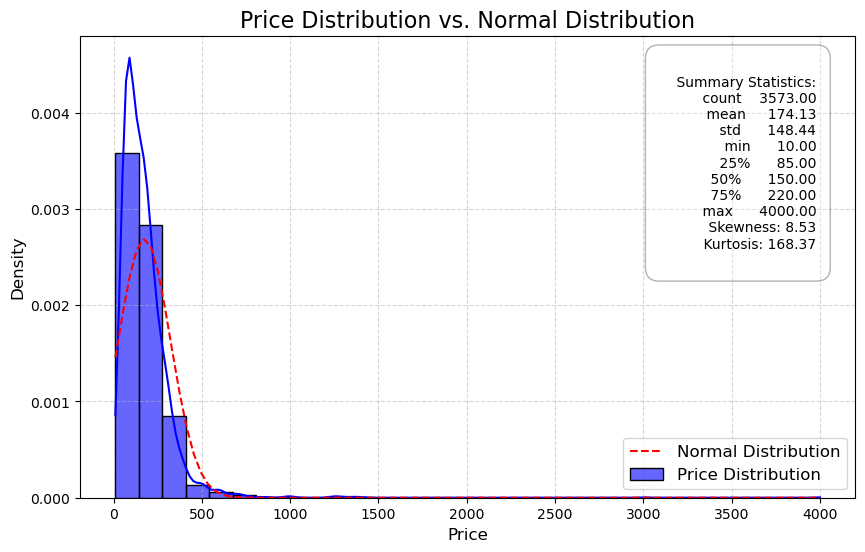

In [7]:
plot_normal_distribution(listings_selected['price'], column_name="Price")

"price," has the following summary statistics:

- count (3573): This is the total number of data points in the "price" column.
- mean (174.13): The average price in the dataset is 174.13.
- std (148.44): The standard deviation shows that there is a significant spread in the price values, with most prices varying by 148.44 from the mean.
- min (10): The lowest price in the dataset is 10.
- 25% (85): The 25th percentile (Q1) indicates that 25% of the data points have a price less than or equal to 85.
- 50% (150): The median (50th percentile) indicates that 50% of the prices are below 150, and 50% are above.
- 75% (220): The 75th percentile (Q3) indicates that 75% of the data points have a price less than or equal to 220.
- max (4000): The highest price in the dataset is 4000.
- Skewness (8.53): This is a very high positive skew, which means that the distribution of prices is heavily right-skewed. There are a few high-value prices (outliers), which pull the mean to the right, but most of the prices are concentrated on the lower end.
- Kurtosis (168.37): This is an extremely high kurtosis, suggesting that the distribution has heavy tails or outliers. The dataset has a lot of extreme values, especially on the higher end.


Let's perform a log transformation on the price column. This will help in addressing heavily skewed or assymetrical data

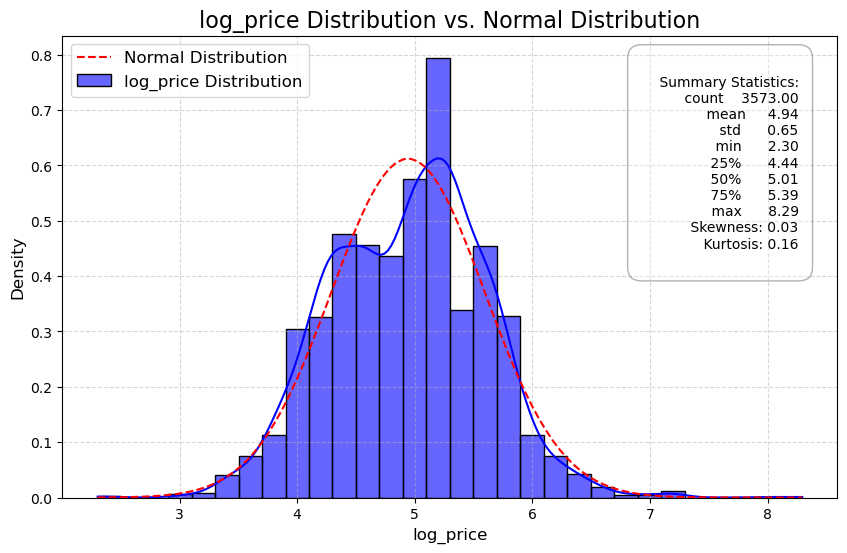

In [8]:
listings_selected['log_price'] = np.log(listings_selected['price'])

plot_normal_distribution(listings_selected['log_price'], column_name="log_price")

After applying the log function:

- mean (4.94): The average value of the log-transformed prices is 4.94.  
- std (0.65): The standard deviation indicates that the log-transformed prices vary by approximately 0.65 from the mean, showing a moderate spread in the data.  
- min (2.30): The smallest value in the dataset is 2.30, representing the lowest log-transformed price.  
- 25% (4.44): The 25th percentile (Q1) indicates that 25% of the log-transformed prices are less than or equal to 4.44.  
- 50% (5.01): The median (50th percentile) shows that 50% of the data points are below 5.01, and 50% are above.  
- 75% (5.39): The 75th percentile (Q3) indicates that 75% of the log-transformed prices are less than or equal to 5.39.  
- max (8.29): The highest value in the dataset is 8.29, representing the largest log-transformed price.  
- skewness (0.03): The skewness is very close to 0, suggesting that the distribution is nearly symmetrical and not significantly skewed to the left or right.  
- kurtosis (0.16): The kurtosis value close to 0 indicates that the distribution is fairly normal, with no heavy tails or excessive outliers.  

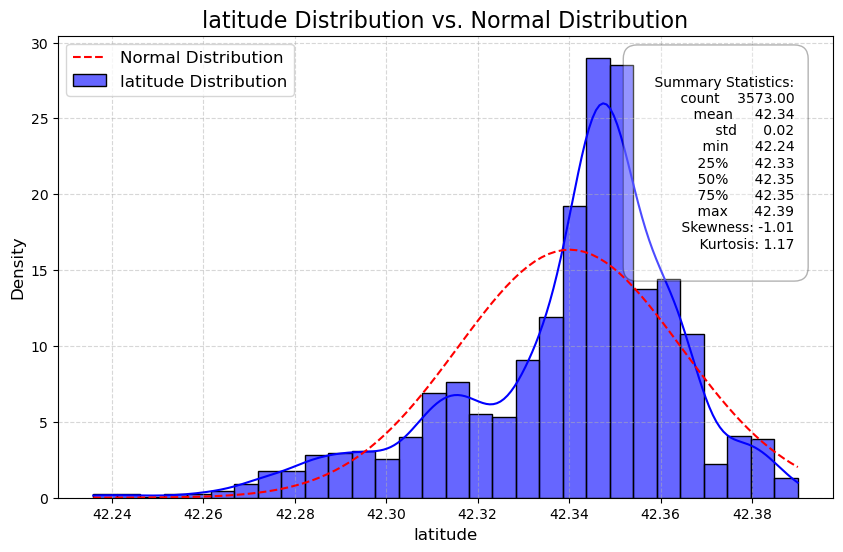

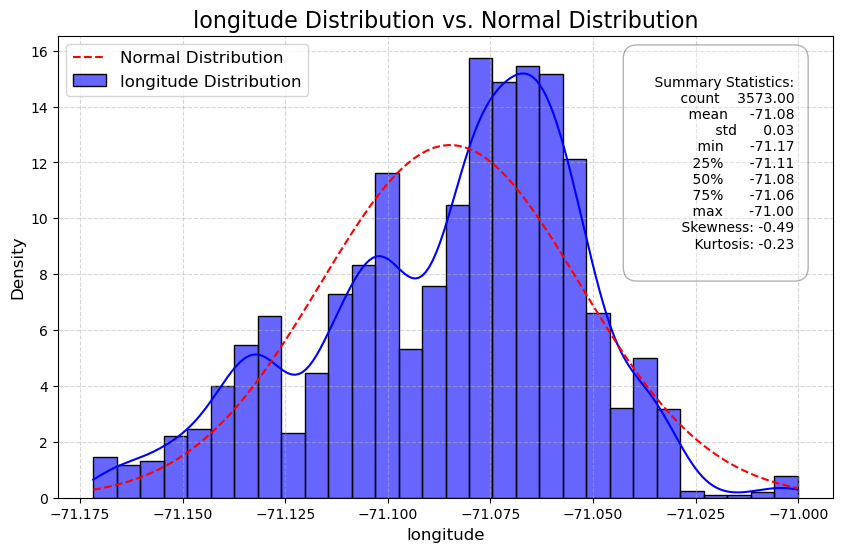

In [9]:
num_columns = ['latitude', 'longitude']

for col in num_columns:
    plot_normal_distribution(listings_selected[col], column_name=col)

- Latitude is left-skewed with a sharper peak and heavier tails.
- Longitude is slightly left-skewed with a flatter peak and lighter tails.

These results indicate that the geographical data (latitude and longitude) has some degree of skewness and non-normality, but the values are tightly clustered around their means with relatively small ranges, suggesting the locations of listings are located close together, which is expected ad this dataset collects data from the Boston area. The outliers are not extreme, but the distributions deviate from perfect normality. 

## Checking distribution of feature variables

We need to check the distribution of feature variables, as heavily imbalanced features could introduce bias in our models, meaning that it overfits on the majority classes but underfit in the minority classes

In [10]:

def plot_class_distribution_bar(df, columns, figsize=(15, 5)):
    """
    Plot bar charts for class distribution of specified columns.
    
    Parameters:
    - df: DataFrame containing the data
    - columns: List of column names to plot the bar charts for
    - figsize: Tuple specifying the figure size (default is (15, 5))
    """
    # Calculate rows and columns for subplots
    num_plots = len(columns)
    cols = 3
    rows = (num_plots // cols) + (num_plots % cols > 0)
    
    # Set up the figure and subplots
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], 5 * rows))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Loop through each specified column and plot bar chart
    plot_idx = 0
    for col in columns:
        # Plot the class distribution using a bar chart
        sns.countplot(x=df[col], ax=axes[plot_idx])
        axes[plot_idx].set_title(f"Class Distribution for {col}")
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Count')

        # Adjust x-axis for columns with many classes
        if df[col].nunique() > 10:
            axes[plot_idx].tick_params(axis='x', labelsize=8, rotation=90)
        else:
            axes[plot_idx].tick_params(axis='x', labelsize=10)
        
        plot_idx += 1

    # Remove empty subplots (if any)
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout to avoid overlap
    plt.tight_layout(pad=4.0)  # Increase padding to avoid overlap
    plt.show()


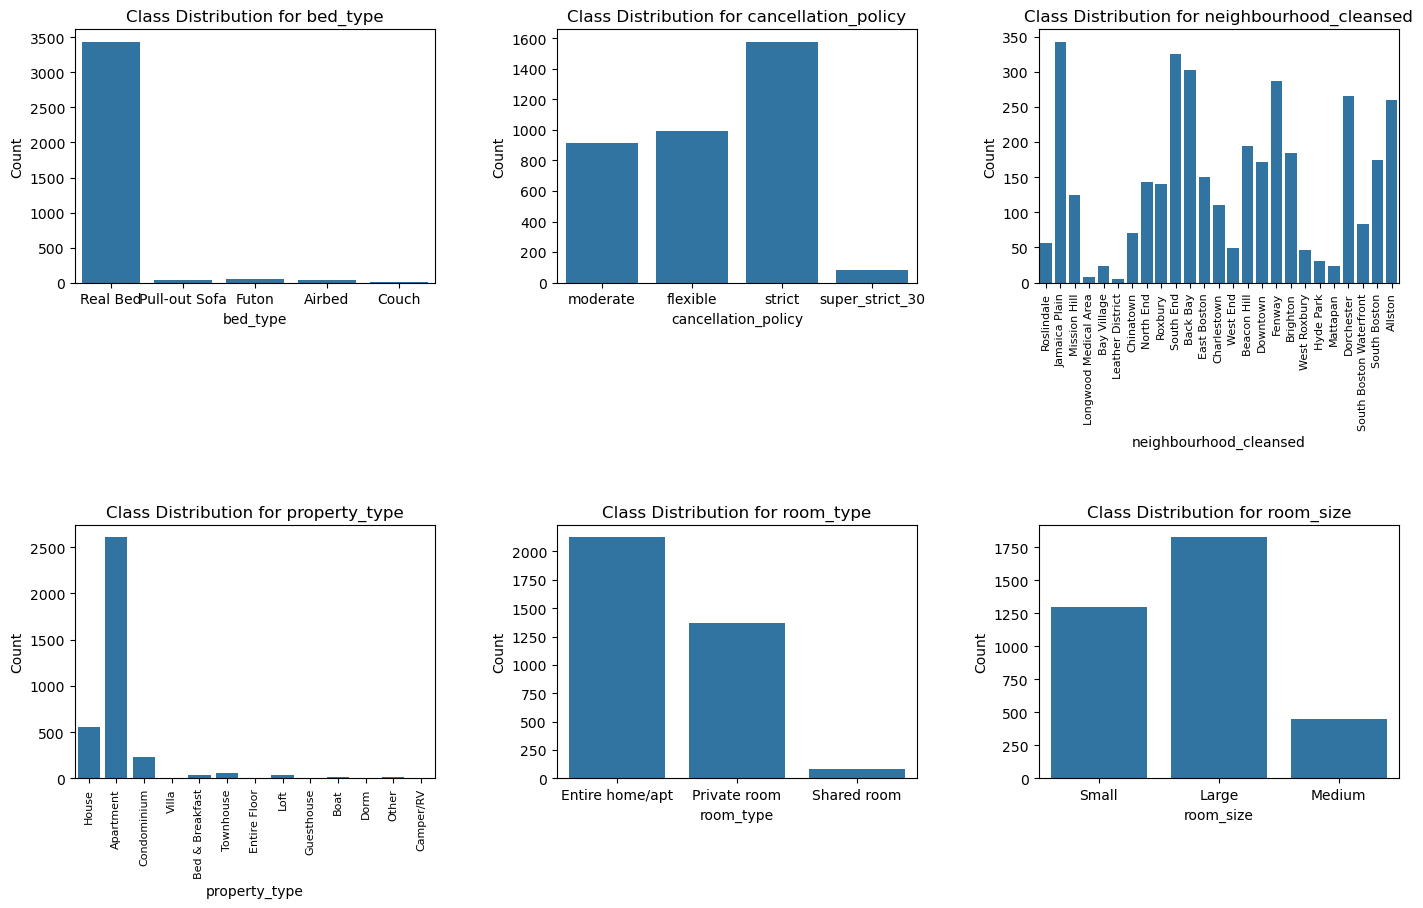

In [11]:
# Histogram for categorical/bool data

categorical_columns=['bed_type', 'cancellation_policy',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'room_size']


plot_class_distribution_bar(listings_selected, categorical_columns)



From the above we can tell that:
- Almost all listings on Airbnb offer real beds, whilst only a few offer pull-out sofa, puton, airbed or couch.
- Most cancellation_policies are strict, whilst super_strict cancellation_policies are rare
- Most listings are located in the Jamaica Plain neighbourhood, whilst Leather district has the least number of listings
- Most listings are aparments
- Entire homes or apartments are listed the most on Airbnb. Shared rooms are more rare.
- Host mostly describe room/space sizes as large.

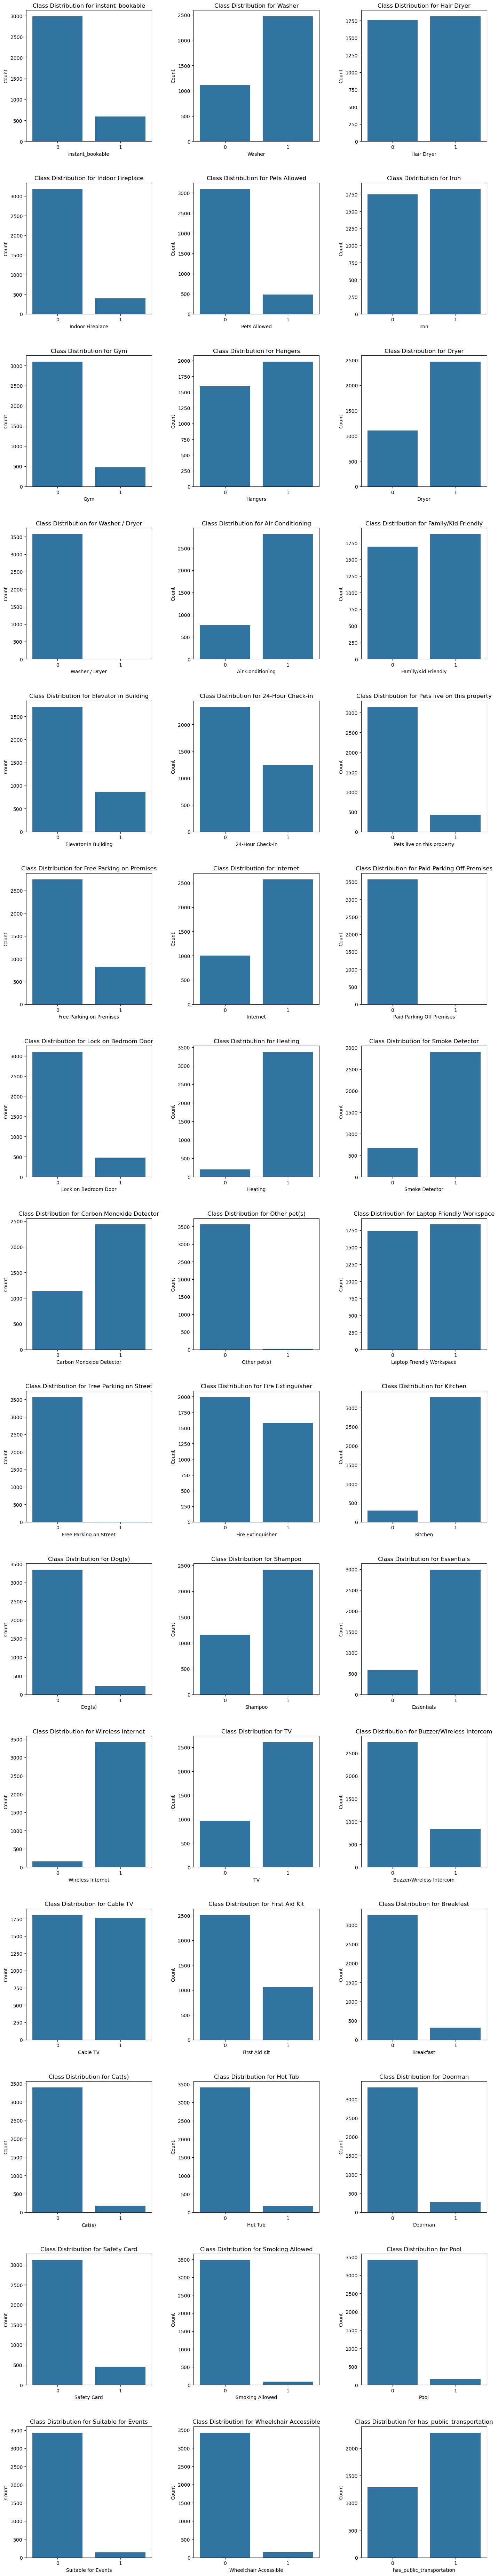

In [12]:
# Histogram for the 
boolean_columns = ['instant_bookable', 'Washer', 'Hair Dryer', 'Indoor Fireplace',
       'Pets Allowed', 'Iron', 'Gym', 'Hangers', 'Dryer', 'Washer / Dryer',
       'Air Conditioning', 'Family/Kid Friendly', 'Elevator in Building',
       '24-Hour Check-in', 'Pets live on this property',
       'Free Parking on Premises', 'Internet', 'Paid Parking Off Premises',
       'Lock on Bedroom Door', 'Heating', 'Smoke Detector',
       'Carbon Monoxide Detector', 'Other pet(s)', 'Laptop Friendly Workspace',
       'Free Parking on Street', 'Fire Extinguisher', 'Kitchen', 'Dog(s)',
       'Shampoo', 'Essentials', 'Wireless Internet', 'TV',
       'Buzzer/Wireless Intercom', 'Cable TV', 'First Aid Kit', 'Breakfast',
       'Cat(s)', 'Hot Tub', 'Doorman', 'Safety Card', 'Smoking Allowed',
       'Pool', 'Suitable for Events', 'Wheelchair Accessible',
       'has_public_transportation']


plot_class_distribution_bar(listings_selected, boolean_columns)


There is quite a significant imbalance class distribution for many amenities. Some amenities have a significantly larger 0 (false) class, meaning a listing does not offer the amenity, whilst other amenities have a significantly larger 1 (true) class, meaning a listing does offer the amenity. Amenities like cable tv, fire extinguisher, laptop friendly workspaces, family/kid friendly, hangers, iron and hair dryers appear to have almost an even split, meaning that a good portion of listings either have or do not have the said amenity.

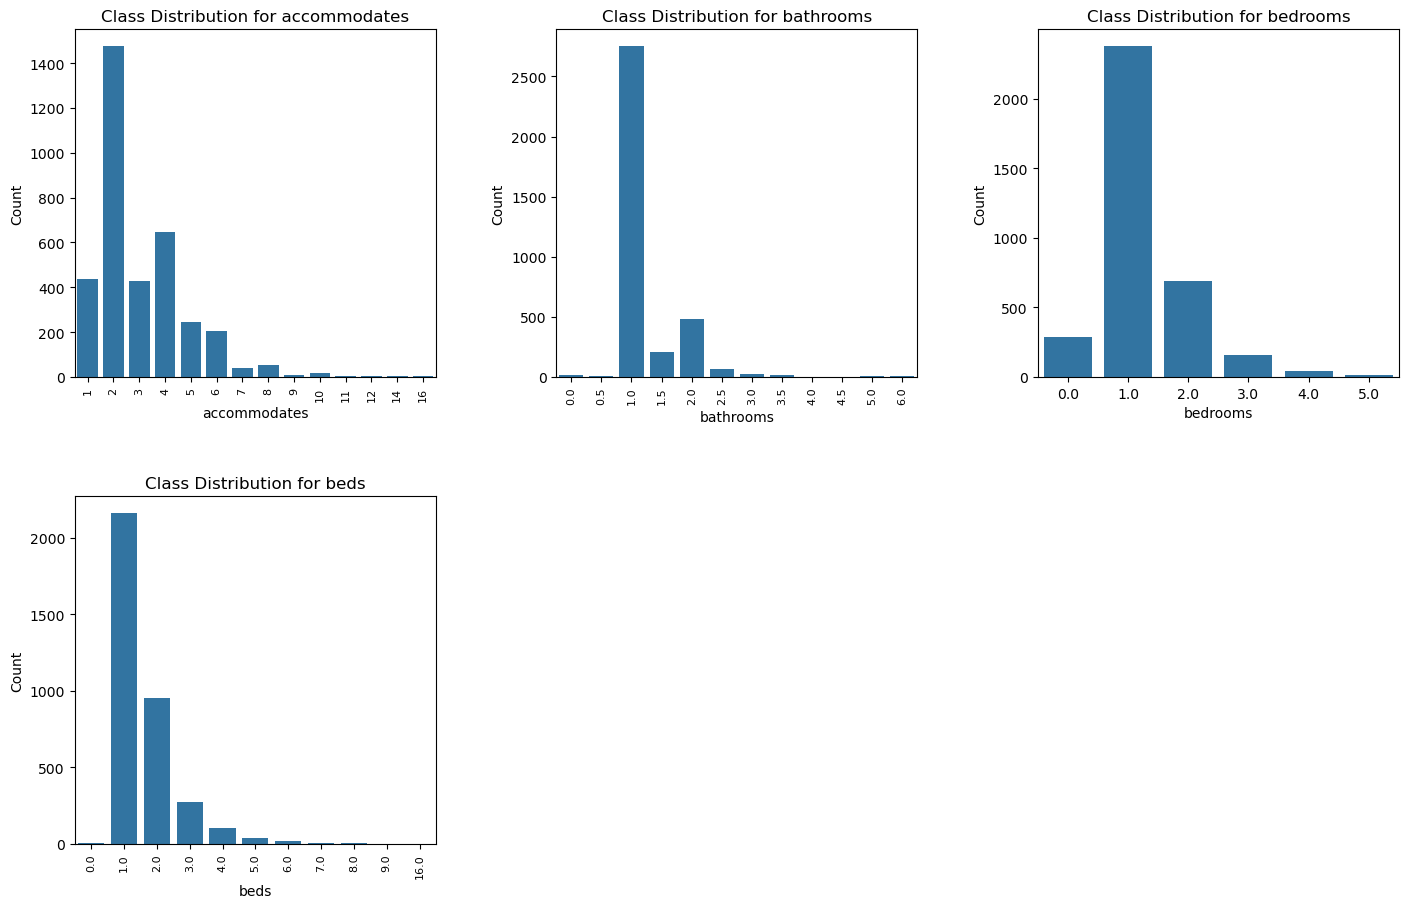

In [74]:

# Histogram for the discrete numerical data
discrete_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']


plot_class_distribution_bar(listings_selected, discrete_columns)


- Most Airbnbs can accomodate 2 people. Airbnbs that can acomodate more than 7 are rare.
- Most Airbnbs have 1 bathroom. More than 2.5 bathrooms or less than 1 are rare.
- Most Airbnbs offer only 1 bedroom.
- Most Airbnbs have at least 1 bed, whilst more than 4 and less than 1 are rare.

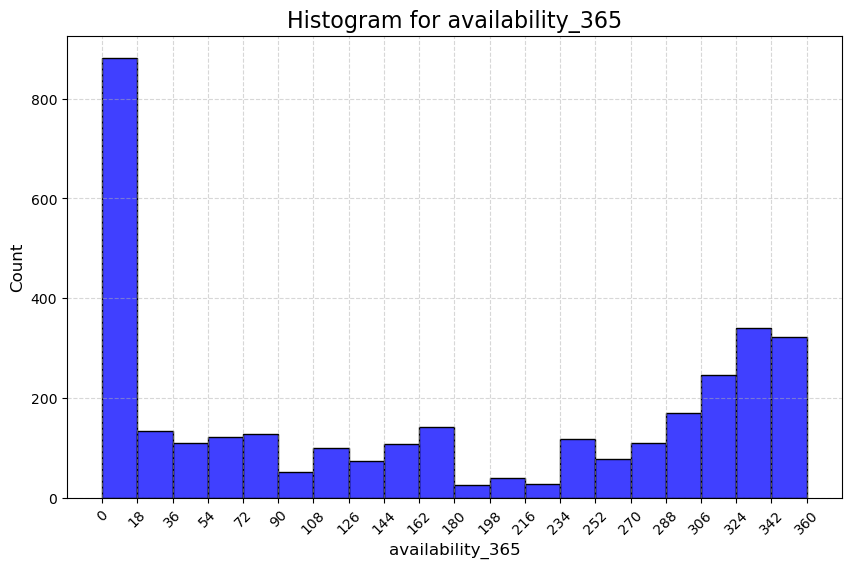

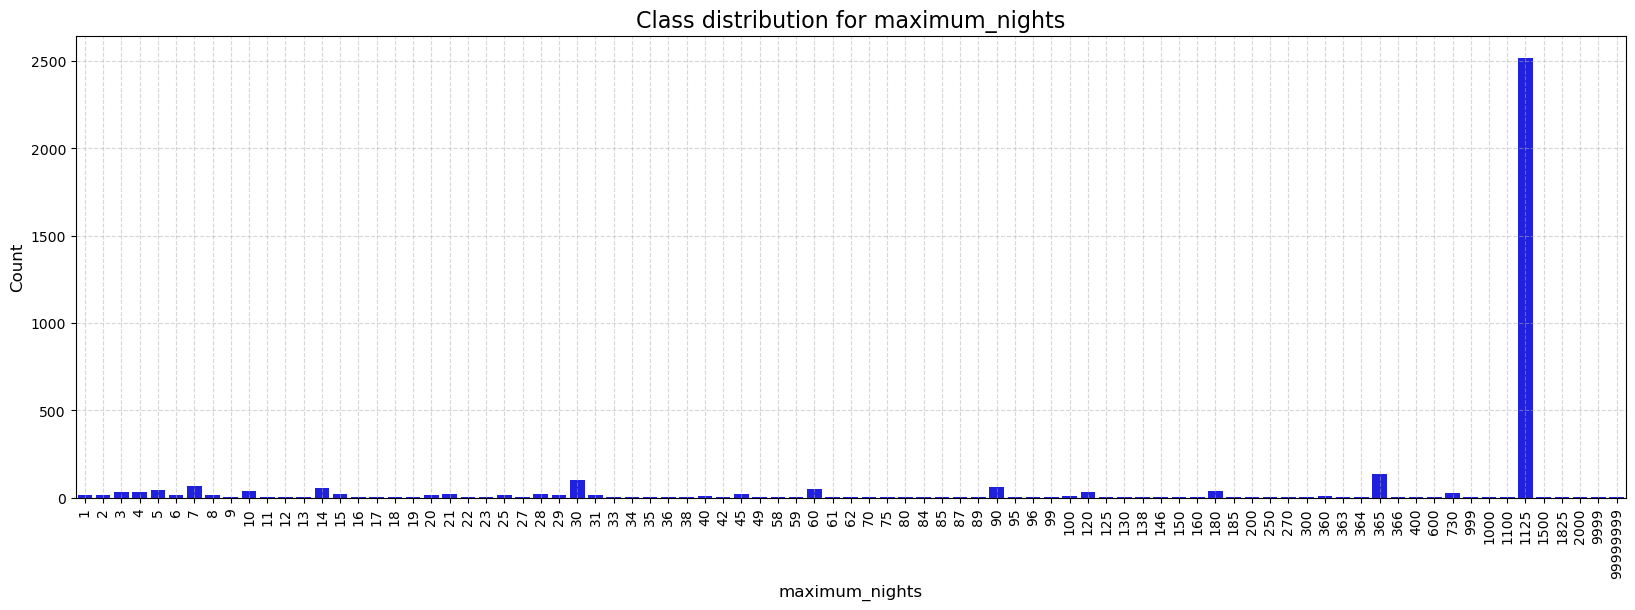

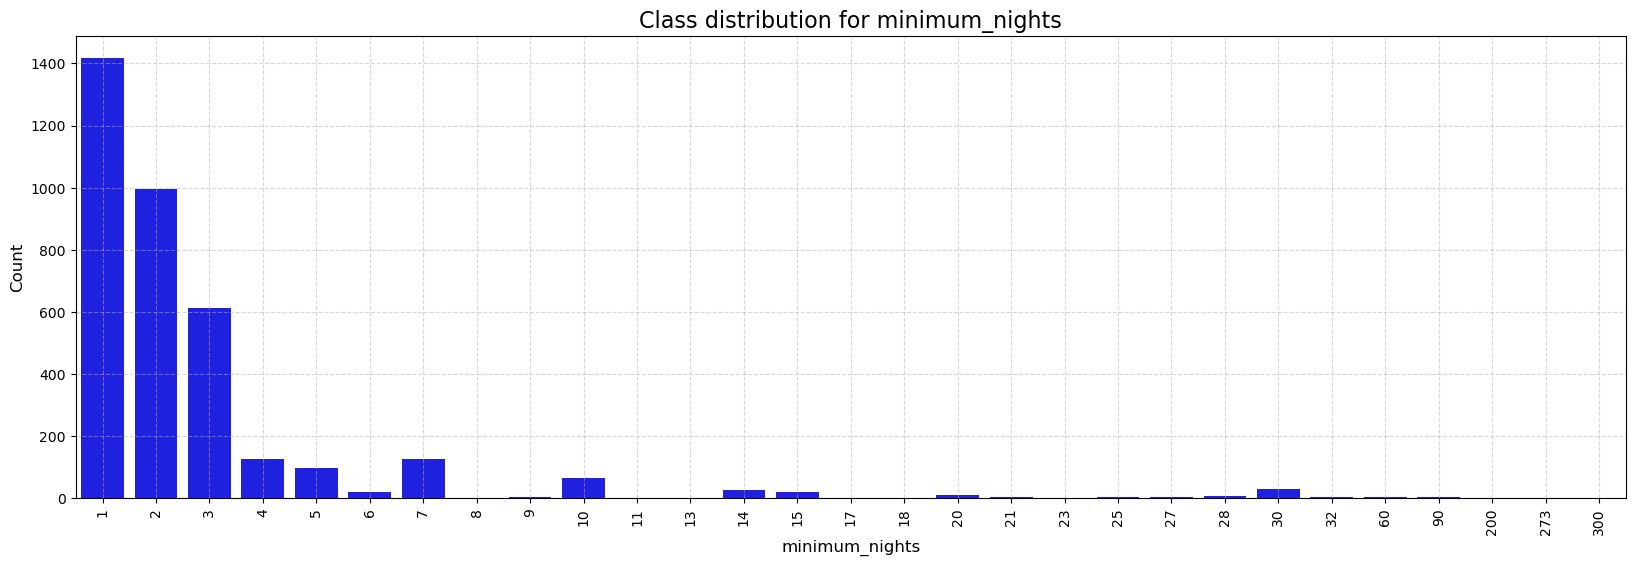

In [79]:
def plot_histogram(column, bins=20, column_name="Column"):
    plt.figure(figsize=(10, 6))

    # Manually calculate the bin edges if you want finer control
    bin_edges = range(int(column.min()), int(column.max()) + 1, (int(column.max()) - int(column.min())) // bins)
    
    # Plot histogram with manually defined bins
    sns.histplot(column, bins=bin_edges, kde=False, color='blue', stat="count")

    # Set the title and labels
    plt.title(f'Histogram for {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Adjust the x-axis ticks to align with the bin edges
    plt.xticks(bin_edges, rotation=45)

    # Show gridlines
    plt.grid(True, linestyle='--', alpha=0.5)


def plot_class_distribution_bar_single(column, column_name="Column"):
    # Create bins for grouping the values
    # binned_column = pd.cut(column, bins=bins)
    plt.figure(figsize=(20, 6))
    sns.countplot(x=column, color='blue')
    plt.title(f'Class distribution for {column_name}', fontsize=16)
    plt.tick_params(axis='x', labelsize=10, rotation=90)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

plot_histogram(listings_selected['availability_365'], bins=20, column_name='availability_365')

plot_class_distribution_bar_single(listings_selected['maximum_nights'], column_name='maximum_nights')

plot_class_distribution_bar_single(listings_selected['minimum_nights'], column_name='minimum_nights')


From the analysis of the above charts, we are able to see that:
- The availability of the listings mostly falls under the first bin, which is from 0-18 days
- Most listings also have a maximum night of 1125 days. This might be a default value set by Airbnb, and we can consider to remove this column
- A majority of listings have a minimum night of between 1-7 days.

## Separating the data into numerical, categorical and boolean for analysis

In [13]:
# Separate numerical, categorical, and boolean columns
numerical_columns = listings_selected.select_dtypes(include=['number']).columns
categorical_columns = listings_selected.select_dtypes(include=['object']).columns
boolean_columns = listings_selected.columns[listings_selected.isin([0, 1]).all()]

# Drop id from numerical column
numerical_columns = numerical_columns.drop('id')

# Ensure 'price' column remains in both numerical and categorical DataFrames
numerical_columns = numerical_columns.append(pd.Index(['price', 'log_price']))
categorical_columns = categorical_columns.append(pd.Index(['price', 'log_price']))


# Remove boolean columns from numerical and categorical DataFrames
numerical_columns = numerical_columns.difference(boolean_columns)
categorical_columns = categorical_columns.difference(boolean_columns)

boolean_columns = boolean_columns.append(pd.Index(['price', 'log_price']))


# Create separate DataFrames
df_numerical = listings_selected[numerical_columns]
df_categorical = listings_selected[categorical_columns]
df_boolean = listings_selected[boolean_columns]




In [14]:
df_numerical

,accommodates,availability_365,bathrooms,bedrooms,beds,latitude,log_price,longitude,maximum_nights,minimum_nights,price
0,4,0,1.5,2.0,3.0,42.282619,5.521461,-71.133068,1125,2,250.0
1,2,359,1.0,1.0,1.0,42.286241,4.174387,-71.134374,15,2,65.0
2,2,319,1.0,1.0,1.0,42.292438,4.174387,-71.135765,45,3,65.0
3,4,98,1.0,1.0,2.0,42.281106,4.317488,-71.121021,1125,1,75.0
4,2,334,1.5,1.0,2.0,42.284512,4.369448,-71.136258,31,2,79.0
...,...,...,...,...,...,...,...,...,...,...,...
3568,3,356,1.0,1.0,1.0,42.380968,4.234107,-71.083795,1125,2,69.0
3569,2,364,1.0,1.0,1.0,42.347503,5.010635,-71.118336,365,3,150.0
3570,4,40,1.0,1.0,1.0,42.371771,5.288267,-71.071300,12,3,198.0
3571,2,253,1.0,1.0,1.0,42.385226,4.174387,-71.080923,13,1,65.0


In [15]:
# Drop unnecessary columns

df_categorical.drop(columns=['summary', 'space', 'space_cleaned', 'amenities', 'transit', 'transit'], inplace=True)
df_categorical 


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24908\3736048239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop(columns=['summary', 'space', 'space_cleaned', 'amenities', 'transit', 'transit'], inplace=True)


,bed_type,cancellation_policy,log_price,neighbourhood_cleansed,price,property_type,room_size,room_type
0,Real Bed,moderate,5.521461,Roslindale,250.0,House,Small,Entire home/apt
1,Real Bed,moderate,4.174387,Roslindale,65.0,Apartment,Small,Private room
2,Real Bed,moderate,4.174387,Roslindale,65.0,Apartment,Small,Private room
3,Real Bed,moderate,4.317488,Roslindale,75.0,House,Large,Private room
4,Real Bed,flexible,4.369448,Roslindale,79.0,House,Small,Private room
...,...,...,...,...,...,...,...,...
3568,Real Bed,strict,4.234107,Charlestown,69.0,Apartment,Small,Private room
3569,Real Bed,strict,5.010635,Allston,150.0,Apartment,Large,Private room
3570,Real Bed,flexible,5.288267,Charlestown,198.0,Apartment,Medium,Entire home/apt
3571,Real Bed,strict,4.174387,Charlestown,65.0,Apartment,Small,Private room


In [16]:
df_boolean

,instant_bookable,Pets Allowed,Dryer,Dog(s),Indoor Fireplace,Elevator in Building,Pool,Hair Dryer,Washer,Wheelchair Accessible,Carbon Monoxide Detector,Other pet(s),Free Parking on Premises,Family/Kid Friendly,Essentials,Hot Tub,Washer / Dryer,Safety Card,Smoking Allowed,TV,Internet,First Aid Kit,Breakfast,Heating,Hangers,Pets live on this property,24-Hour Check-in,Laptop Friendly Workspace,Free Parking on Street,Smoke Detector,Buzzer/Wireless Intercom,Air Conditioning,Fire Extinguisher,Iron,Cat(s),Cable TV,Lock on Bedroom Door,Gym,Doorman,Wireless Internet,Paid Parking Off Premises,Suitable for Events,Kitchen,Shampoo,has_public_transportation,price,log_price
0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,250.0,5.521461
1,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,1,65.0,4.174387
2,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,65.0,4.174387
3,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,1,75.0,4.317488
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,79.0,4.369448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,69.0,4.234107
3569,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,150.0,5.010635
3570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,198.0,5.288267
3571,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,65.0,4.174387


## Correlation Analysis

We want to analyse which features correlate most with the price we want to predict.

- In this section, we perform:
- pearson's correlation for numerical columns
- point-biserial correlation for boolean columns
- Kruskal-willis for categorical columns

To summarize our findings:
- availability_365, maximum_nights, minimum_nights do not have a strong correlation with price.
- Amenities such as Suitable for Events, Safety Card, Dog(s), Free Parking on Street, Other pet(s), Carbon Monoxide Detector, Smoke Detector, Paid Parking Off Premises, Washer / Dryer, Hangers do not have a strong correlation/statistical significance with price.
- All other categorical such as bed_type, cancellation_policy, neighbourhood_cleansed, property_type, room_size, room_type have a statistical significance with price.



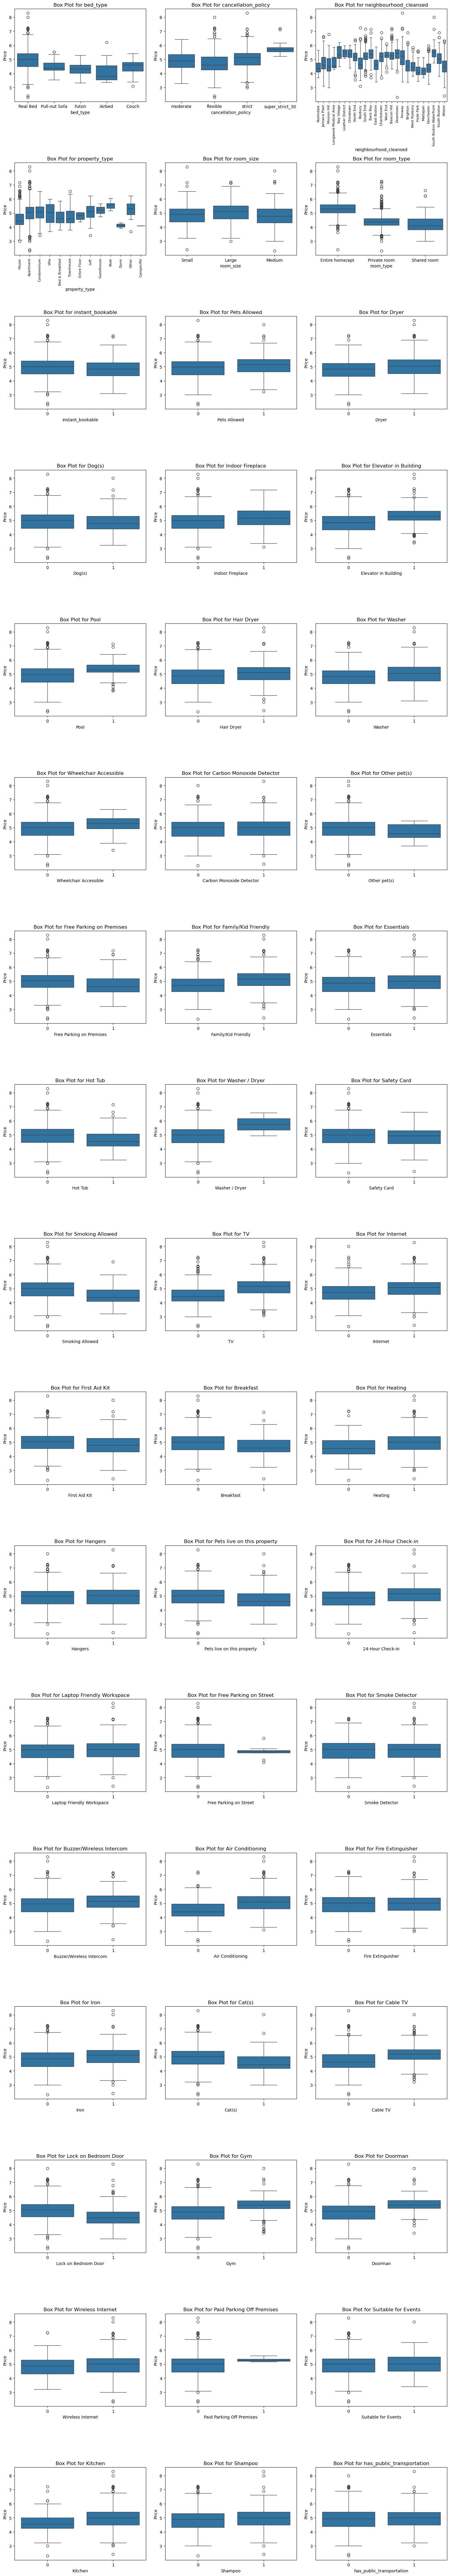

In [85]:
# Set up the figure and subplots
num_categorical_cols = len(df_categorical.columns) - 1  # excluding 'price'
num_boolean_cols = len(df_boolean.columns) - 1  # excluding 'price'
num_plots = num_categorical_cols + num_boolean_cols

# Calculate rows and columns for subplots
rows = (num_plots // 3) + (num_plots % 3 > 0)
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot box plots for categorical columns
plot_idx = 0
for col in df_categorical.columns:
    if col == 'log_price' or col=='price':
        continue
    
    sns.boxplot(x=df_categorical[col], y=df_categorical['log_price'], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Box Plot for {col}")
    axes[plot_idx].set_xlabel(col)
    axes[plot_idx].set_ylabel('Price')
    
    # Adjust x-axis for columns with many classes
    if df_categorical[col].nunique() > 10:
        axes[plot_idx].tick_params(axis='x', labelsize=8, rotation=90)
    else:
        axes[plot_idx].tick_params(axis='x', labelsize=10)
    
    plot_idx += 1

# Plot box plots for boolean columns
for col in df_boolean.columns:
    if col == 'log_price' or col == 'price':
        continue
    
    sns.boxplot(x=df_boolean[col], y=df_boolean['log_price'], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Box Plot for {col}")
    axes[plot_idx].set_xlabel(col)
    axes[plot_idx].set_ylabel('Price')
    axes[plot_idx].set_xticks([0, 1])  # Explicitly set x-axis to 0 and 1
    axes[plot_idx].tick_params(axis='x', labelsize=10)
    
    plot_idx += 1

# Remove empty subplots (if any)
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Box plots are created to compare the distribution of log_price across the different categorical and boolean variables. From this, we can visualise if certain features (e.g having a hair dryer or allowing pets) are associated with higher or lower prices.

When plotting the box plots for categorical and boolean variables for each class of the variable vs the log price, we can see that certain classes have higher median log price values compared to other classes.

For example, listings with real beds have higher median log price values compared to all other bed types. Similarly, entire homes or apartments have higher median log price values compared to the other room types. Meanwhile for hangers, the minimum, maximum, median and IQR appear to be very similar between listings with no hangers and listings without hangers, meaning that there is little variation in price between these two groups.

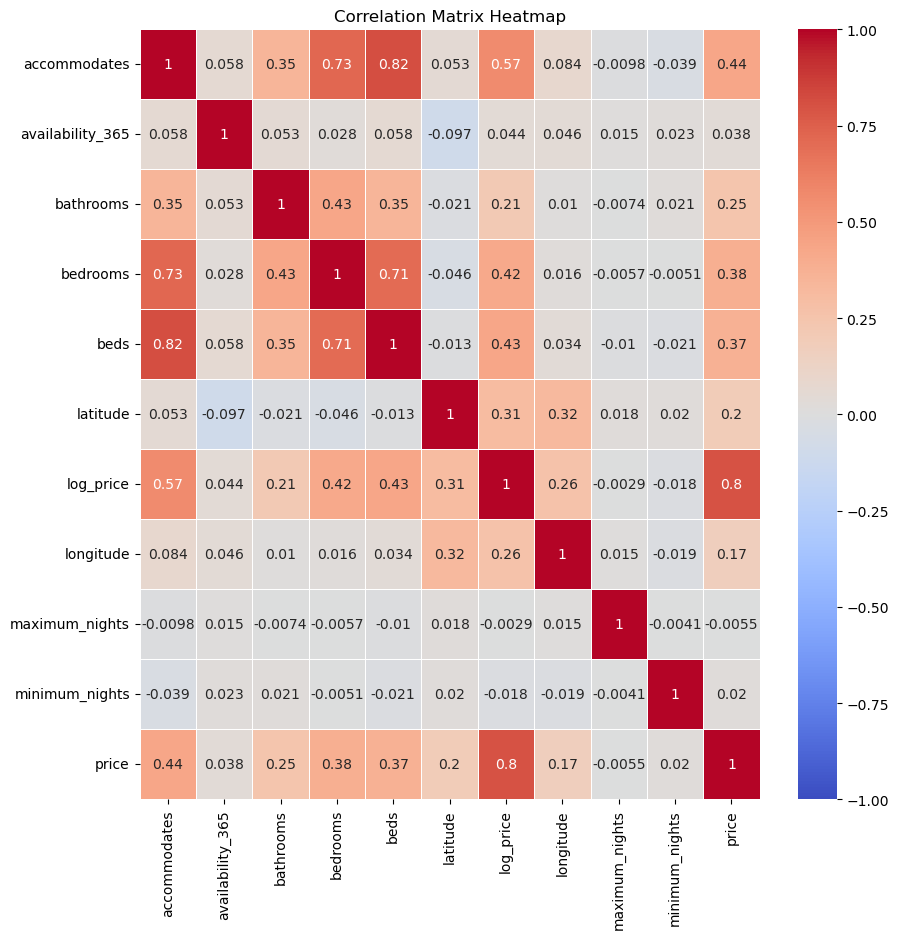

In [86]:
# Calculate correlation matrix for numerical columns
corr_matrix = df_numerical.corr()


# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Based on the correlation matrix, availability_365, maximum_nights, minimum_nights do not have a strong correlation with price. We can drop these columns.

listings_selected = listings_selected.drop(columns=['availability_365', 'maximum_nights', 'minimum_nights'])


The correlation matrix above uses pearson's correlation between two numerical values, in this case the numerical features vs the price. Grids that are red, show positive correlation, whilst grids that are blue, show negative correlation between two specific variables.

We can see that variables like accomodates, bathrooms, bedrooms, beds, latitude and longitude all are positively correlated with the price. However, availability_365, maximum_nights, minimum_nights show very little correlation.

For our model, we will drop the columns that have weak relationships with the log_price column.

In [87]:
from scipy.stats import pointbiserialr


# Assuming 'price' is your continuous column and df_boolean contains binary columns
results = []

for col in df_boolean.columns:
    if col == 'log_price':
        continue
    
    # Calculate point-biserial correlation
    correlation, p_value = pointbiserialr(df_boolean[col], df_boolean['log_price'])
    
    # Determine statistical significance
    significant = "Yes" if p_value < 0.05 else "No"
    
    # Append results
    results.append((col, correlation, p_value, significant))

# Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=["Feature", "Correlation", "P-value", "Significant"])

# Display the results
results_df


,Feature,Correlation,P-value,Significant
0,instant_bookable,-0.076629,4.527309e-06,Yes
1,Pets Allowed,0.086800,2.031561e-07,Yes
2,Dryer,0.168753,3.099260e-24,Yes
3,Dog(s),-0.015865,3.430882e-01,No
4,Indoor Fireplace,0.113085,1.210133e-11,Yes
5,Elevator in Building,0.296059,3.314107e-73,Yes
6,Pool,0.125781,4.492704e-14,Yes
7,Hair Dryer,0.139061,6.825506e-17,Yes
8,Washer,0.160145,5.887091e-22,Yes
9,Wheelchair Accessible,0.098457,3.690487e-09,Yes


In [88]:
# based on the results for point-biserial correlation, we can drop the columns with no significance

# If results_df has significance No, drop the column from listings_selected
for idx, row in results_df.iterrows():
    if row['Significant'] == 'No':
        listings_selected.drop(columns=[row['Feature']], inplace=True)

Point-biserial correlation shows the pearson's correlation between boolean features vs the log_price variable.

Key findings from the point-biserial correlation show that listings that have a TV, air conditioning, cable TV, are family/kid friendly, have an elevator, a gym or a doorman tend to have strong positive correlations with price.

Meanwhile, listings that have a lock on the bedroom door, free parking on premises, allow smoking, cats and have pets on the property tend to have strong negative correlations with price.

In [89]:
from scipy import stats

# We used Kruskal-Willis instead of ANOVA because for some features, variance is unequal: https://www.statology.org/anova-unequal-sample-size/

# Loop through each categorical column
for col in df_categorical.columns:
    if col == 'log_price' or col == 'price':
        continue
    # Group the data by the current categorical column
    grouped = [group['log_price'].values for _, group in df_categorical.groupby(col)]
    
    # Perform Levene's test to check if the variances are equal
    levene_stat, levene_p_value = stats.levene(*grouped)
    
    # Perform Bartlett's test (optional)
    bartlett_stat, bartlett_p_value = stats.bartlett(*grouped)
    
    # Print results for each column
    print(f"Levene's Test for {col}: stat={levene_stat}, p-value={levene_p_value}")
    print(f"Bartlett's Test for {col}: stat={bartlett_stat}, p-value={bartlett_p_value}")
    
    # Check if the p-value is less than 0.05 for Levene's test
    if levene_p_value < 0.05:
        print(f"There is a significant difference in variances for {col}. The variances are unequal.\n")
    else:
        print(f"The variances are equal for {col}.\n")

    # Check if the p-value is less than 0.05 for Bartlett's test (optional)
    if bartlett_p_value < 0.05:
        print(f"Bartlett's test suggests that the variances are unequal for {col}.\n")
    else:
        print(f"Bartlett's test suggests that the variances are equal for {col}.\n")


Levene's Test for bed_type: stat=4.521025687218661, p-value=0.0012101830086856096
Bartlett's Test for bed_type: stat=16.477924855254397, p-value=0.0024405475974770222
There is a significant difference in variances for bed_type. The variances are unequal.

Bartlett's test suggests that the variances are unequal for bed_type.

Levene's Test for cancellation_policy: stat=24.56931798755171, p-value=9.878206813134954e-16
Bartlett's Test for cancellation_policy: stat=78.44897370720368, p-value=6.602210196417807e-17
There is a significant difference in variances for cancellation_policy. The variances are unequal.

Bartlett's test suggests that the variances are unequal for cancellation_policy.

Levene's Test for neighbourhood_cleansed: stat=4.58060222812775, p-value=9.892539533114638e-13
Bartlett's Test for neighbourhood_cleansed: stat=128.21563688026365, p-value=3.260820805477698e-16
There is a significant difference in variances for neighbourhood_cleansed. The variances are unequal.

Bartle

c:\Users\Sarah\anaconda3\envs\AI\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Sarah\anaconda3\envs\AI\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Sarah\anaconda3\envs\AI\Lib\site-packages\scipy\stats\_morestats.py:2903: RuntimeWarning: divide by zero encountered in divide
  * ((xp.sum(1/(Ni - 1), axis=0, dtype=dtype)) - 1/(Ntot - k)))


In [90]:
# Create a list to store results
results = []

# Loop through each categorical column
for col in df_categorical.columns:
    if col == 'price' or col == 'log_price':
        continue  # Skip the 'price' column
    print(f"Kruskal-Wallis Test for {col}:")
    
    # Group the data by the current categorical column and extract the 'price' values
    grouped = [group['log_price'].values for _, group in df_categorical.groupby(col)]
    
    # Perform the Kruskal-Wallis test
    stat, p_value = stats.kruskal(*grouped)
    
    # Print the statistic and p-value
    print(f"  Statistic: {stat}, p-value: {p_value}")
    
    # Check if the p-value is less than 0.05
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    
    # Append the results to the list
    results.append([col, stat, p_value, significance])
    
    # Print whether there is a significant difference
    if p_value < 0.05:
        print(f"There is a significant difference in {col} categories.\n")
    else:
        print(f"No significant difference in {col} categories.\n")

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results, columns=['Column', 'Statistic', 'P-Value', 'Significance'])

# Print the results table
print("Kruskal-Wallis Test Results:")
results_df


Kruskal-Wallis Test for bed_type:
  Statistic: 119.07050197673125, p-value: 8.436792432294804e-25
There is a significant difference in bed_type categories.

Kruskal-Wallis Test for cancellation_policy:
  Statistic: 296.3965103605122, p-value: 5.993079741146805e-64
There is a significant difference in cancellation_policy categories.

Kruskal-Wallis Test for neighbourhood_cleansed:
  Statistic: 1159.0585714324734, p-value: 1.3019984715097472e-229
There is a significant difference in neighbourhood_cleansed categories.

Kruskal-Wallis Test for property_type:
  Statistic: 243.5102653009115, p-value: 3.081255352827049e-45
There is a significant difference in property_type categories.

Kruskal-Wallis Test for room_size:
  Statistic: 134.8979394644638, p-value: 5.096647943161357e-30
There is a significant difference in room_size categories.

Kruskal-Wallis Test for room_type:
  Statistic: 1779.100883101958, p-value: 0.0
There is a significant difference in room_type categories.

Kruskal-Wallis

,Column,Statistic,P-Value,Significance
0,bed_type,119.070502,8.436792e-25,Significant
1,cancellation_policy,296.396510,5.993080e-64,Significant
2,neighbourhood_cleansed,1159.058571,1.301998e-229,Significant
3,property_type,243.510265,3.081255e-45,Significant
4,room_size,134.897939,5.096648e-30,Significant
5,room_type,1779.100883,0.000000e+00,Significant


The Kruskal-Wallis test is a non- statistical test used to determine if there are significant differences between the medians of two or more independent groups. It is often used when the assumptions for an ANOVA are not met.

First, we conducted the Leven's and Bartlett's test for equal variance to see if there is significant difference in variance between the groups of these categorical features. Most of the categorical features we have exhibit unequal variance, so we chose to do the Kruskal-Wallis test instead of the ANOVA test.

- Bed Type: Price medians differ significantly between bed types, indicating bed type influences pricing.  
- Cancellation Policy: Prices vary significantly based on cancellation policies, with stricter or more flexible policies affecting medians.  
- Neighbourhood Cleansed: Neighborhoods show substantial differences in price medians, highlighting location as a key factor in pricing.  
- Property Type: Distinct property types (e.g., house, apartment) exhibit significant differences in price medians.  
- Room Size: Price medians differ significantly across room sizes, with larger rooms likely commanding higher prices.  
- Room Type: Room types (e.g., entire home, private room) show very strong differences in price medians, making it a major factor in pricing.  

In [91]:
# Drop id, summary, space, amenities, transit, space_cleaned columns

listings_selected.drop(columns=['id', 'summary', 'space', 'amenities', 'transit', 'space_cleaned', 'price'], inplace=True)

# After feature selection through correlation analysis
listings_selected

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,instant_bookable,Pets Allowed,Dryer,Indoor Fireplace,Elevator in Building,Pool,Hair Dryer,Washer,Wheelchair Accessible,Free Parking on Premises,Family/Kid Friendly,Essentials,Hot Tub,Smoking Allowed,TV,Internet,First Aid Kit,Breakfast,Heating,Pets live on this property,24-Hour Check-in,Laptop Friendly Workspace,Buzzer/Wireless Intercom,Air Conditioning,Fire Extinguisher,Iron,Cat(s),Cable TV,Lock on Bedroom Door,Gym,Doorman,Wireless Internet,Kitchen,Shampoo,has_public_transportation,room_size,log_price
0,Roslindale,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,moderate,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,Small,5.521461
1,Roslindale,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,moderate,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,Small,4.174387
2,Roslindale,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,moderate,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,Small,4.174387
3,Roslindale,42.281106,-71.121021,House,Private room,4,1.0,1.0,2.0,Real Bed,moderate,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,1,Large,4.317488
4,Roslindale,42.284512,-71.136258,House,Private room,2,1.5,1.0,2.0,Real Bed,flexible,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,Small,4.369448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,Charlestown,42.380968,-71.083795,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,strict,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,1,0,Small,4.234107
3569,Allston,42.347503,-71.118336,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,strict,0,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,Large,5.010635
3570,Charlestown,42.371771,-71.071300,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,flexible,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Medium,5.288267
3571,Charlestown,42.385226,-71.080923,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,strict,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Small,4.174387


In [92]:
# Save the cleaned data to a new CSV file

listings_selected.to_csv('listings_selected_final.csv', index=False)

In [93]:
# Most regression models that work on categorical data require one-hot encoding. We will one-hot encode all the categorical columns in the dataset

categorical_columns = listings_selected.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
listings_selected_encoded = pd.get_dummies(listings_selected, columns=categorical_columns, dtype='int')

# Save to CSV file
listings_selected_encoded.to_csv('listings_selected_encoded.csv', index=False)

listings_selected_encoded

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,instant_bookable,Pets Allowed,Dryer,Indoor Fireplace,Elevator in Building,Pool,Hair Dryer,Washer,Wheelchair Accessible,Free Parking on Premises,Family/Kid Friendly,Essentials,Hot Tub,Smoking Allowed,TV,Internet,First Aid Kit,Breakfast,Heating,Pets live on this property,24-Hour Check-in,Laptop Friendly Workspace,Buzzer/Wireless Intercom,Air Conditioning,Fire Extinguisher,Iron,Cat(s),Cable TV,Lock on Bedroom Door,Gym,Doorman,Wireless Internet,Kitchen,Shampoo,has_public_transportation,log_price,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,room_size_Large,room_size_Medium,room_size_Small
0,42.282619,-71.133068,4,1.5,2.0,3.0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,5.521461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,42.286241,-71.134374,2,1.0,1.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,4.174387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
2,42.292438,-71.135765,2,1.0,1.0,1.0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,4.174387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,42.281106,-71.121021,4,1.0,1.0,2.0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,1,4.317488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,42.284512,-71.136258,2,1.5,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,4.369448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,42.380968,-71.083795,3,1.0,1.0,1.0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,1,0,4.234107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3569,42.347503,-71.118336,2,1.0,1.0,1.0,0,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,5.010635,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
3570,42.

# Model Construction & Comparison

In this section, we performed the following steps:
1. Data Splitting: Divided the data into training, validation, and test sets.
2. Model Selection: Chose three regression models: Multiple Linear Regression, Decision Tree Regression, and Random Forest Regression.
3. Model Training: Trained each model on the training set.
4. Model Evaluation: Evaluated the performance of the models on the validation set using MAE and R².
5. Hyperparameter Tuning: Tuned the hyperparameters of each model to improve performance.
6. Final Evaluation: Assessed the models on the test set to determine which performed the best.

To summarise our findings:
- The results showed that Random Forest performed the best with the lowest Mean Absolute Error (MAE) and highest R² value.
- Linear Regression and Decision Tree models had slightly lower accuracy.

## 1. Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## 2. Load and Prepare Data

In [41]:
# Loads dataset with one-hot encoded categorical columns
listings_selected_encoded = pd.read_csv('listings_selected_encoded.csv')

# Separate features (X) and target variable (y)
X = listings_selected_encoded.drop(columns='log_price')  # Drop target column
y = listings_selected_encoded['log_price']  # Target variable

## 3. Split Data into Training, Validation, and Testing Sets

The dataset is split into three parts:
1. Training Set: Used to train the models.
2. Validation Set: Used to evaluate and tune the models during training.
3. Test Set: Used to assess the final performance of the models.

By the end of this process, you have: 70% for training, 15% for validation, and 15% for testing.

In [42]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## 4. Model Selection, Training & Evaluation
Three regression models are selected for this task:
- Multiple Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Gradient Boost Machine Regression
- XGBoost Regression
- Voting Regression Model

Each model will be trained on the training data to learn from it.

After training, we will test the models using the validation data. We will check how well each model performs by using these metrics:

- MAE (Mean Absolute Error): This tells us how far off the predictions are, on average.
- MSE (Mean Squared Error): This looks at the average of the squared differences between the predicted values and the actual values.
- R² (R-squared): This shows how well the model can predict the outcome based on the input features.

Model 1 - Multiple Linear Regression

In [43]:
# --- Model 1: Multiple Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = linear_model.predict(X_val)

# Evaluate performance (Mean Absolute Error, Mean Squared Error, R2)
mae_linear = mean_absolute_error(y_val, y_val_pred)
mse_linear = mean_squared_error(y_val, y_val_pred)
r2_linear = r2_score(y_val, y_val_pred)

print("Linear Regression Model Evaluation:")
print(f"MAE: {mae_linear}, MSE: {mse_linear}, R^2: {r2_linear}")

Linear Regression Model Evaluation:
MAE: 0.26728280021602835, MSE: 0.13750211502101597, R^2: 0.6830342689267074


Model 2 - Decision Tree Regression

In [44]:
# --- Model 2: Decision Tree Regression ---
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_tree = tree_model.predict(X_val)

# Evaluate performance
mae_tree = mean_absolute_error(y_val, y_val_pred_tree)
mse_tree = mean_squared_error(y_val, y_val_pred_tree)
r2_tree = r2_score(y_val, y_val_pred_tree)

print("\nDecision Tree Model Evaluation:")
print(f"MAE: {mae_tree}, MSE: {mse_tree}, R^2: {r2_tree}")



Decision Tree Model Evaluation:
MAE: 0.32403061956354684, MSE: 0.22026633075436544, R^2: 0.49224869342760125


Model 3 - Random Forest Regression

In [45]:
# --- Model 3: Random Forest Regression ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate performance
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R^2: {r2_rf}")



Random Forest Model Evaluation:
MAE: 0.24171223349295515, MSE: 0.11990437441510929, R^2: 0.7236000501551405


Model 4: Support Vector Regression

In [46]:
# --- Model 4: Support Vector Regression ---
svr_model = SVR(kernel='rbf') 
svr_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_svr = svr_model.predict(X_val)

# Evaluate performance
mae_svr = mean_absolute_error(y_val, y_val_pred_svr)
mse_svr = mean_squared_error(y_val, y_val_pred_svr)
r2_svr = r2_score(y_val, y_val_pred_svr)

print("\nSupport Vector Regression (SVR) Model Evaluation:")
print(f"MAE: {mae_svr}, MSE: {mse_svr}, R^2: {r2_svr}")


Support Vector Regression (SVR) Model Evaluation:
MAE: 0.3239282427054612, MSE: 0.18583880043069653, R^2: 0.571609998644047


Model 5 - Gradient Boosting Machine

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)


# Predict on the validation set
y_val_pred_gbm = gbm_model.predict(X_val)


# Evaluate performance
mae_gbm = mean_absolute_error(y_val, y_val_pred_gbm)
mse_gbm = mean_squared_error(y_val, y_val_pred_gbm)
r2_gbm = r2_score(y_val, y_val_pred_gbm)

print("\nGBM Model Evaluation:")
print(f"MAE: {mae_gbm}, MSE: {mse_gbm}, R^2: {r2_gbm}")



GBM Model Evaluation:
MAE: 0.24993636948183404, MSE: 0.12375856205230414, R^2: 0.7147154929835625


Model 6 - XG Regressor

In [ ]:
# ! pip install xgboost
## If you do not have xgboost installed, run this

In [49]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor # type: ignore

In [50]:
# --- Model 6: XGBoost Regression ---
XG_model= XGBRegressor()
XG_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_xg = XG_model.predict(X_val)

# Evaluate performance
mae_xg = mean_absolute_error(y_val, y_val_pred_xg)
mse_xg = mean_squared_error(y_val, y_val_pred_xg)
r2_xg = r2_score(y_val, y_val_pred_xg)

print("\nXGBoost Regression Model Evaluation:")
print(f"MAE: {mae_xg}, MSE: {mse_xg}, R^2: {r2_xg}")


XGBoost Regression Model Evaluation:
MAE: 0.25489791000480205, MSE: 0.13101837956343235, R^2: 0.6979803804762259


Model 7 - Voting Regression Model

In [51]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

voting_model = VotingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Added RandomForestRegressor
    ]
)
voting_model.fit(X_train, y_train)
y_val_pred_voting = voting_model.predict(X_val)

print("Voting Regressor:")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred_voting)}, MSE: {mean_squared_error(y_val, y_val_pred_voting)}, R^2: {r2_score(y_val, y_val_pred_voting)}")


Voting Regressor:
MAE: 0.24171110607430588, MSE: 0.11686939988023967, R^2: 0.7305961819752711


Model 8 - Neural Network

In [25]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore to supress warning
from tensorflow.keras.optimizers import Adam # type: ignore


nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with specified input dimension
    Dense(256, activation='relu'),  
    Dense(128, activation='relu'),  
    Dense(1, activation='linear')  # Output layer (regression problem)
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping # type: ignore
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = nn_model.fit(X_train, y_train, epochs=300, batch_size=256, 
                       validation_data=(X_val, y_val), 
                       callbacks=[early_stopping], verbose=1)


Epoch 1/300


C:\Users\Amira Raina\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.3001 - mae: 3.3001 - val_loss: 0.4885 - val_mae: 0.4885
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9233 - mae: 0.9233 - val_loss: 0.4725 - val_mae: 0.4725
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6966 - mae: 0.6966 - val_loss: 0.4747 - val_mae: 0.4747
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5565 - mae: 0.5565 - val_loss: 0.6475 - val_mae: 0.6475
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5457 - mae: 0.5457 - val_loss: 0.4132 - val_mae: 0.4132
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4035 - mae: 0.4035 - val_loss: 0.3540 - val_mae: 0.3540
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3658 - mae: 0.3658 - val_loss: 0.3381 - val_mae: 0.3381
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3379 - mae: 0.3379 - val_loss: 0.3019 - val_mae: 0.3019
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3112 - mae: 0

In [69]:
y_val_pred_nn = nn_model.predict(X_val)

mae_nn = mean_absolute_error(y_val, y_val_pred_nn)
mse_nn = mean_squared_error(y_val, y_val_pred_nn)
r2_nn = r2_score(y_val, y_val_pred_nn)

print("Neural Network Model:")
print(f"MAE: {mae_nn}, MSE: {mse_nn}, R²: {r2_nn}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network Model:
MAE: 0.2638529968975151, MSE: 0.13575056878754893, R²: 0.6870718805104616


## 5. Hyperparameter Tuning
Hyperparameter tuning helps improve a model’s performance by finding the best settings for its parameters. 

In this section, we tune the settings for 2 models: Decision Tree Regression and Random Forest Regression. 

Linear Regression generally doesn't require hyperparameter tuning, so to keep it simple, we'll skip this for Linear Regression and continue with the other models.

- Hyperparameter Tuning for Decision Tree Regression

In [52]:
# --- Hyperparameter Tuning (for Decision Tree) ---
param_grid_tree = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                                param_grid=param_grid_tree, 
                                cv=3, 
                                scoring='neg_mean_absolute_error')
grid_search_tree.fit(X_train, y_train)

# Display best parameters
print(f"\nBest parameters for Decision Tree: {grid_search_tree.best_params_}")


Best parameters for Decision Tree: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


- Hyperparameter Tuning for Random Forest Regression

In [53]:
# --- Hyperparameter Tuning (for Random Forest) ---
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]  
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=10, 
                              scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, y_train)

# Display best parameters
print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")



Best parameters for Random Forest: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


- Hyperparameter Tuning for Support Vector Regression

In [54]:
# Define hyperparameter grid for SVR
param_grid_svr = {
    'C': [0.001, 0.01, 0.1],   # Smaller values for better regularization
    'gamma': [0.0001, 0.001, 'scale'],  # Further reduce gamma
    'epsilon': [0.1, 0.5, 2],  # Larger epsilon to tolerate more error
}

# Perform GridSearchCV for SVR
grid_search_svr = GridSearchCV(
    estimator=SVR(kernel='rbf'),  # Try 'linear' if overfitting persists
    param_grid=param_grid_svr,
    cv=10,  # Increase folds for better validation
    scoring='neg_mean_absolute_error',  # MAE for error metric
    verbose=1,
    n_jobs=-1
)

grid_search_svr.fit(X_train, y_train)

# Display best parameters
print(f"\nBest parameters for SVR: {grid_search_svr.best_params_}")


Fitting 10 folds for each of 27 candidates, totalling 270 fits

Best parameters for SVR: {'C': 0.1, 'epsilon': 0.1, 'gamma': 0.001}


- Hyperparameter Tuning for Gradient Boosting Machine

In [55]:
# Define hyperparameter grid
param_grid_gbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_gbm.fit(X_train, y_train)

# Display best parameters
print(f"\nBest parameters for GBM model: {grid_search_gbm.best_params_}")


Best parameters for GBM model: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}


- Hyperparameter Tuning for XGBoost Regression

In [56]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [30, 50, 80],             # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],           # Step size shrinkage (lower values prevent overfitting)
    'max_depth': [2,3,4],                    # Maximum depth of trees
    'subsample': [0.5, 0.7],                # Fraction of samples for training
    'colsample_bytree': [0.3, 0.5],         # Fraction of features for training
    'gamma': [0.5, 1, 5],                      # Minimum loss reduction (tested 0.01,0.1,0.3,0.5) -> 0.1 and 0.3 chosen -> 0.1
    'reg_alpha': [10, 50, 100],               # L1 regularization
    'reg_lambda': [10, 50, 100]               # L2 regularization
}

XG_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search_xgb = GridSearchCV(
    XG_model, param_grid, 
    cv=5, scoring='r2', 
    verbose=1, n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)

# Display best parameters
print(f"\nBest parameters for XGB: {grid_search_xgb.best_params_}")

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits

Best parameters for XGB: {'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80, 'reg_alpha': 10, 'reg_lambda': 10, 'subsample': 0.7}


- Hyperparameter Tuning for Neural Network

Warning: This will take 3 hours to run, we have commented out this to prevent accidental runs

In [ ]:
#  ! pip install scikeras

In [38]:
# This section takes 3 hours to run ! 

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from scikeras.wrappers import KerasRegressor
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam, RMSprop
# from sklearn.metrics import r2_score

# # Step 2: Scale the data
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# # Fit and transform the training data
# X_train_scaled = scaler_X.fit_transform(X_train)
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# # Transform the test data (using the scaler fitted on the training data)
# X_test_scaled = scaler_X.transform(X_test)
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# # Step 3: Define the neural network model
# def create_model(optimizer='adam', learning_rate=0.001, dropout_rate=0.2, num_units=128):
#     model = Sequential()
#     model.add(Dense(num_units, input_dim=X_train_scaled.shape[1], activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='linear'))  # Linear activation for regression
    
#     # Compile the model
#     if optimizer == 'adam':
#         optimizer = Adam(learning_rate=learning_rate)
#     elif optimizer == 'rmsprop':
#         optimizer = RMSprop(learning_rate=learning_rate)
    
#     model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
#     return model

# # Step 4: Wrap the Keras model using KerasRegressor
# model = KerasRegressor(model=create_model, verbose=0)

# # Step 5: Define the parameter grid for GridSearchCV
# param_grid = {
#     'model__optimizer': ['adam', 'rmsprop'],  # Optimizer options
#     'model__learning_rate': [0.001, 0.01, 0.1],  # Learning rate options
#     'model__dropout_rate': [0.1, 0.2, 0.3, 0.4],  # Dropout rate options
#     'model__num_units': [64, 128, 256],  # Number of units in the hidden layer
#     'batch_size': [32, 64, 128],  # Batch size options
#     'epochs': [200, 300]  # Number of epochs
# }

# # Step 6: Apply GridSearchCV to find the best parameters
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)  # cv=5 for 5-fold cross-validation
# grid_search.fit(X_train_scaled, y_train_scaled)

# # Step 7: Print the best parameters and the best score
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# # Step 8: Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred_scaled = best_model.predict(X_test_scaled)

# # Inverse transform the scaled predictions and targets
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# # Calculate R^2 score
# r2 = r2_score(y_test_original, y_pred)
# print(f"R^2 Score on Test Set: {r2}")

C:\Users\Amira Raina\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Amira Raina\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 128, 'epochs': 200, 'model__dropout_rate': 0.1, 'model__learning_rate': 0.001, 'model__num_units': 256, 'model__optimizer': 'rmsprop'}
Best Score (Negative MSE): 0.678693024607331
R^2 Score on Test Set: 0.6883216651816843


## 6. Build Models with Optimized Hyperparameters
After tuning, we'll build the models with the optimized parameters obtained from the grid search.

In [57]:
# 1. Optimized Decision Tree Model
best_tree_model = grid_search_tree.best_estimator_

# 2. Optimized Random Forest Model
best_rf_model = grid_search_rf.best_estimator_

# 3. Optimized SVR Model
best_svr_model = grid_search_svr.best_estimator_

# 4. Optimized GBM Model
best_gbm_model = grid_search_gbm.best_estimator_

# 5. Optimized XGB Model
best_xg_model = grid_search_xgb.best_estimator_


# Build the models with optimized hyperparameters on the entire training set
best_tree_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)
best_svr_model.fit(X_train, y_train)
best_gbm_model.fit(X_train, y_train)
best_xg_model.fit(X_train, y_train)

# For linear regression, we'll just use it directly
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# 4. Optimized GBM Model
best_gbm_model = grid_search_gbm.best_estimator_
best_gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=4,
                          min_samples_split=5, n_estimators=150)

In [59]:
# 7. Optimized Voting Model

best_voting_model = VotingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(learning_rate=0.05, max_depth= 5, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 150)),
        ('rf', RandomForestRegressor(max_depth= None, max_features= 0.5, min_samples_leaf= 2, min_samples_split= 5, n_estimators=200))  # Added RandomForestRegressor
    ]
)
best_voting_model.fit(X_train, y_train)



VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=5,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       n_estimators=150)),
                            ('rf',
                             RandomForestRegressor(max_features=0.5,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_estimators=200))])

In [33]:
# 8. Optimized neural network
# best_model = grid_search.best_estimator_

# history = best_model.fit(X_train_processed, y_train_scaled, epochs=grid_search.best_params_['epochs'], 
#                          batch_size=grid_search.best_params_['batch_size'], validation_data=(X_val_processed, y_val_scaled))


C:\Users\Amira Raina\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 7. Plot Learning Curves

Learning curves are essential tools for evaluating the performance of a machine learning model during training and validation. They help us understand how well the model is learning and whether it is underfitting or overfitting.

Purpose:
- Training Curve: Shows the model's performance on the training data as the training progresses.
- Validation Curve: Displays the model's performance on unseen validation data.




In [67]:
# A function to create a learning curve plot (to see if the model underfits or overfits - adjust hyperparameters if necessary)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# use this function
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Convert negative MSE to positive RMSE
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    val_rmse = np.sqrt(-val_scores.mean(axis=1))

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_rmse, 'o-', label="Training RMSE")
    plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")
    plt.xlabel("Training Samples")
    plt.ylabel("RMSE")
    plt.title(title)
    plt.legend()
    plt.show()



C:\Users\Amira Raina\AppData\Local\Temp\ipykernel_268\3454564184.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


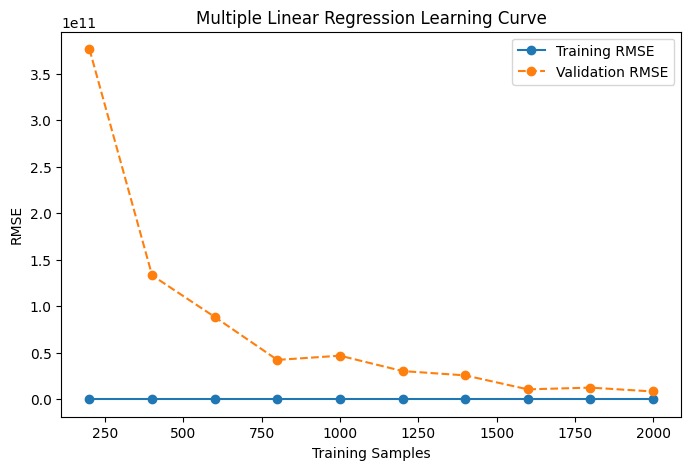

In [68]:
plot_learning_curve(linear_model, X_train, y_train, "Multiple Linear Regression Learning Curve")


It appears that the validation RMSE decreases significantly, but the training RMSE stays the same, with increased number of samples. It could be because this model is underfitting

C:\Users\Amira Raina\AppData\Local\Temp\ipykernel_27856\1233530026.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


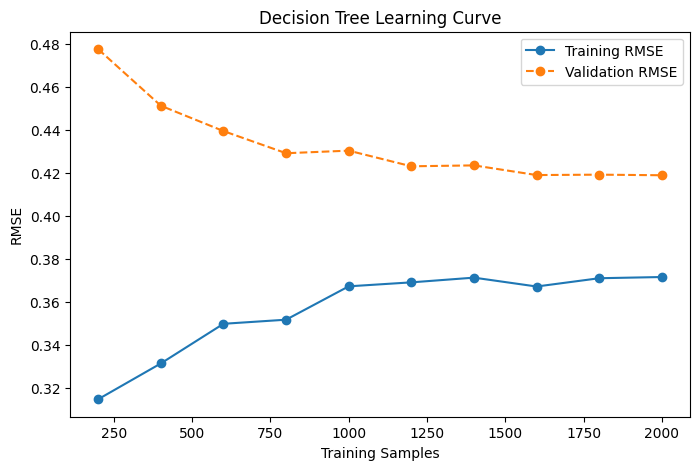

In [88]:
plot_learning_curve(best_tree_model, X_train, y_train, "Decision Tree Learning Curve")

There is a generalization gap between training and validation RMSE. With more samples, validation RMSE decreased whilst training RMSE increased. The lines start to flatten out around 1250 samples.

C:\Users\Amira Raina\AppData\Local\Temp\ipykernel_27856\1233530026.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


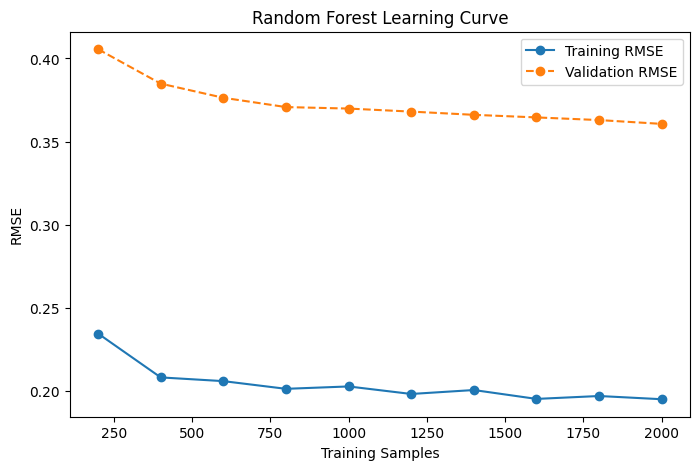

In [89]:
plot_learning_curve(best_rf_model, X_train, y_train, "Random Forest Learning Curve")


The learning curve for this shows overfitting due to the gap between the validation RMSE and training RMSE. Using more training samples may not benefit the model any more due to the fact that it had plateaued even with smaller training samples

C:\Users\Amira Raina\AppData\Local\Temp\ipykernel_27856\1233530026.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


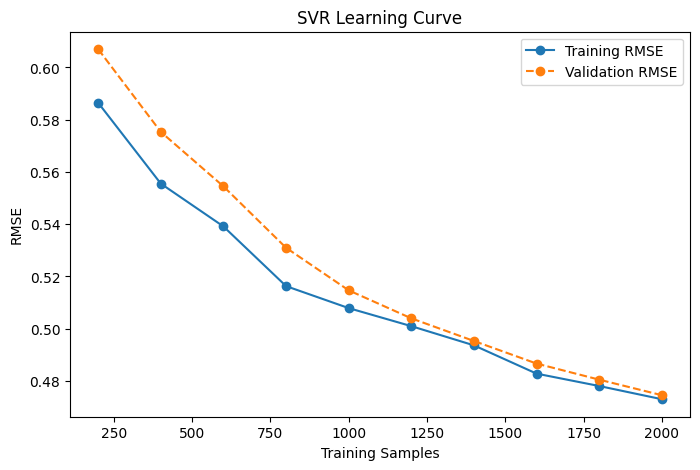

In [78]:
plot_learning_curve(best_svr_model, X_train, y_train, "SVR Learning Curve")


The SVR learning curve appears to not have plateaued and could benefit from more training samples as the RMSE is still on the higher compared to the rest of the models

C:\Users\Sarah\AppData\Local\Temp\ipykernel_19500\3454564184.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


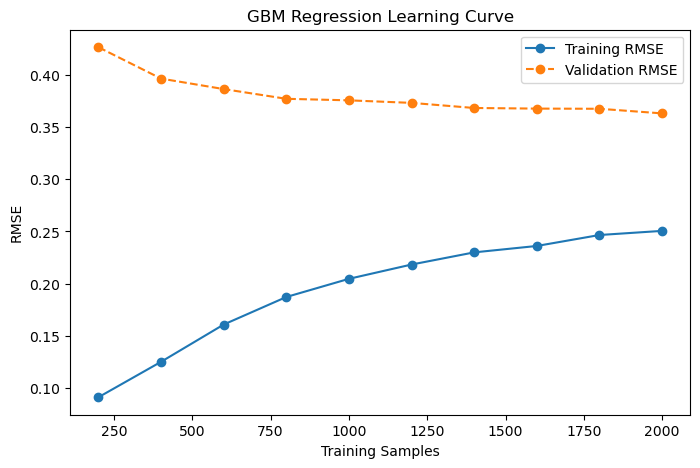

In [56]:
plot_learning_curve(best_gbm_model, X_train, y_train, "GBM Regression Learning Curve")


As samples increase, the training RMSE increases, but the validation RMSE decreases. The learning curve for the voting model appears to have some slight overfitting. However. Because the range of log price is from 2.30 and 8.29, the RMSE is still considered small enough

C:\Users\Amira Raina\AppData\Local\Temp\ipykernel_27856\1233530026.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


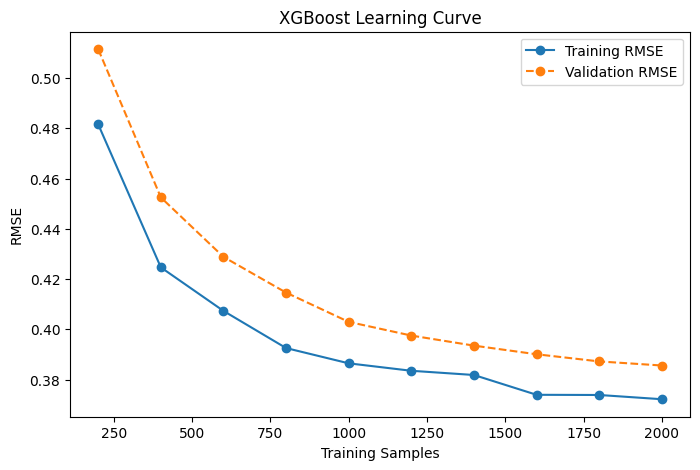

In [79]:
plot_learning_curve(best_xg_model, X_train, y_train, "XGBoost Learning Curve")


Training RMSE and validation RMSE both decrease as training samples increase. There might be some slight overfitting due to the gap between the validation and training RMSE

C:\Users\Sarah\AppData\Local\Temp\ipykernel_19500\3454564184.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, val_rmse, 'o-', label="Validation RMSE", linestyle="dashed")


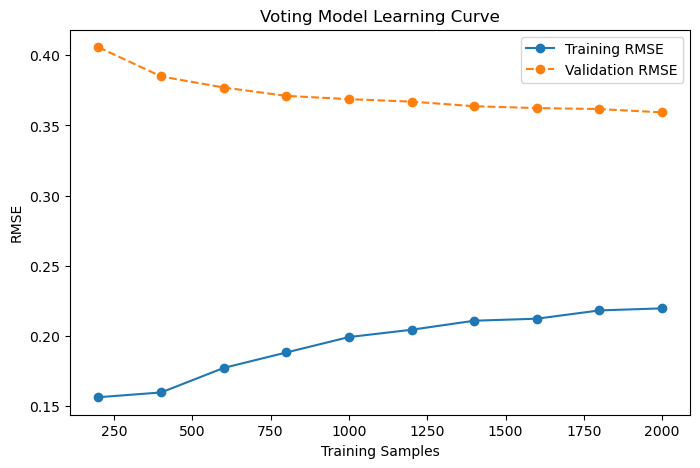

In [74]:
plot_learning_curve(best_voting_model, X_train, y_train, "Voting Model Learning Curve")


As samples increase, the training RMSE increases, but the validation RMSE decreases. The learning curve for the voting model appears to have some slight overfitting. However, because the range of log price is from 2.30 and 8.29, the RMSE for validation is still considered small enough

## 8.  Evaluate Optimized Models on the Validation Set

The purpose of this step is to check how well the models perform after we’ve fine-tuned their settings.

In [64]:
# --- Evaluate Optimized Models on Validation Set ---

# 1. Optimized Multiple Linear Regression
y_val_pred_linear = linear_model.predict(X_val)
mae_linear = mean_absolute_error(y_val, y_val_pred_linear)
mse_linear = mean_squared_error(y_val, y_val_pred_linear)
r2_linear = r2_score(y_val, y_val_pred_linear)

# 2. Optimized Decision Tree
y_val_pred_tree = best_tree_model.predict(X_val)
mae_tree = mean_absolute_error(y_val, y_val_pred_tree)
mse_tree = mean_squared_error(y_val, y_val_pred_tree)
r2_tree = r2_score(y_val, y_val_pred_tree)

# 3. Optimized Random Forest
y_val_pred_rf = best_rf_model.predict(X_val)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

# 4. Optimized Support Vector Regression
y_val_pred_svr = best_svr_model.predict(X_val)
mae_svr = mean_absolute_error(y_val, y_val_pred_svr)
mse_svr = mean_squared_error(y_val, y_val_pred_svr)
r2_svr_opt = r2_score(y_val, y_val_pred_svr)

# 6. Optimized GBM Forest
y_val_pred_gbm = best_gbm_model.predict(X_val)
mae_gbm = mean_absolute_error(y_val, y_val_pred_gbm)
mse_gbm = mean_squared_error(y_val, y_val_pred_gbm)
r2_gbm = r2_score(y_val, y_val_pred_gbm)

# 6. Optimized XGBoost Regression
y_val_pred_xg = best_xg_model.predict(X_val)
mae_xg = mean_absolute_error(y_val, y_val_pred_xg)
mse_xg = mean_squared_error(y_val, y_val_pred_xg)
r2_xg_opt = r2_score(y_val, y_val_pred_xg)

# 7. Optimized Voting Model Regression
y_val_pred_voting = best_voting_model.predict(X_val)
mae_voting = mean_absolute_error(y_val, y_val_pred_voting)
mse_voting = mean_squared_error(y_val, y_val_pred_voting)
r2_voting = r2_score(y_val, y_val_pred_voting)

# 8. Neural Network
y_val_pred_nn = best_voting_model.predict(X_val)
mae_nn = mean_absolute_error(y_val, y_val_pred_nn)
mse_nn = mean_squared_error(y_val, y_val_pred_nn)
r2_nn = r2_score(y_val, y_val_pred_nn)

# Display evaluation results
print("\nOptimized Model Evaluation (on Validation Set):")
print(f"Multiple Linear Regression: MAE: {mae_linear}, MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Optimized Decision Tree: MAE: {mae_tree}, MSE: {mse_tree}, R^2: {r2_tree}")
print(f"Optimized Random Forest: MAE: {mae_rf}, MSE: {mse_rf}, R^2: {r2_rf}")
print(f"Optimized Support Vector Regression: MAE: {mae_svr}, MSE: {mse_svr}, R^2: {r2_svr}")
print(f"Optimized GBM: MAE: {mae_gbm}, MSE: {mse_gbm}, R^2: {r2_gbm}")
print(f"Optimized XGBoost Regression: MAE: {mae_xg}, MSE: {mse_xg}, R^2: {r2_xg}")
print(f"Optimized Voting Regression Model: MAE: {mae_voting}, MSE: {mse_voting}, R^2: {r2_voting}")
print(f"Optimized Neural Network Regression: MAE: {mae_nn}, MSE: {mse_nn}, R^2: {r2_nn}")



Optimized Model Evaluation (on Validation Set):
Multiple Linear Regression: MAE: 0.26728280021602835, MSE: 0.13750211502101597, R^2: 0.6830342689267074
Optimized Decision Tree: MAE: 0.29226867962167136, MSE: 0.16205734751114304, R^2: 0.6264302871136407
Optimized Random Forest: MAE: 0.239790556198842, MSE: 0.11856236673913984, R^2: 0.7266936058001181
Optimized Support Vector Regression: MAE: 0.3434599621000613, MSE: 0.20335219909558827, R^2: 0.571609998644047
Optimized GBM: MAE: 0.2503519441682184, MSE: 0.1231436204017831, R^2: 0.7161330379412894
Optimized XGBoost Regression: MAE: 0.2695198812810711, MSE: 0.1372375010422439, R^2: 0.6979803804762259
Optimized Voting Regression Model: MAE: 0.24298077322055756, MSE: 0.11854411390240344, R^2: 0.7267356816892012
Optimized Neural Network Regression: MAE: 0.24298077322055756, MSE: 0.11854411390240344, R^2: 0.7267356816892012


## 9. Final Evaluation on Test Set

The final evaluation on the test set checks how well the model performs on new, unseen data, giving an overall measure of its accuracy in real-world use.

In [65]:
# --- Final Evaluation on Test Set ---
y_test_pred_linear = linear_model.predict(X_test)
y_test_pred_tree = best_tree_model.predict(X_test)
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_svr = best_svr_model.predict(X_test)
y_test_pred_gbm = best_gbm_model.predict(X_test)
y_test_pred_xg = best_xg_model.predict(X_test)
y_test_pred_voting = best_voting_model.predict(X_test)
y_test_pred_nn = nn_model.predict(X_test)


#  Evaluate all models on the test set
mae_test_linear = mean_absolute_error(y_test, y_test_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)

mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

mae_test_gbm = mean_absolute_error(y_test, y_test_pred_gbm)
mse_test_gbm = mean_squared_error(y_test, y_test_pred_gbm)
r2_test_gbm = r2_score(y_test, y_test_pred_gbm)

mae_test_xg = mean_absolute_error(y_test, y_test_pred_xg)
mse_test_xg = mean_squared_error(y_test, y_test_pred_xg)
r2_test_xg = r2_score(y_test, y_test_pred_xg)

mae_test_voting = mean_absolute_error(y_test, y_test_pred_voting)
mse_test_voting = mean_squared_error(y_test, y_test_pred_voting)
r2_test_voting = r2_score(y_test, y_test_pred_voting)

mae_test_nn = mean_absolute_error(y_test, y_test_pred_nn)
mse_test_nn = mean_squared_error(y_test, y_test_pred_nn)
r2_test_nn = r2_score(y_test, y_test_pred_nn)

print("\nTest Set Evaluation:")
print(f"Linear Regression: MAE: {mae_test_linear}, MSE: {mse_test_linear}, R^2: {r2_test_linear}")
print(f"Optimized Decision Tree: MAE: {mae_test_tree}, MSE: {mse_test_tree}, R^2: {r2_test_tree}")
print(f"Optimized Random Forest: MAE: {mae_test_rf}, MSE: {mse_test_rf}, R^2: {r2_test_rf}")
print(f"Optimized Support Vector Regression: MAE: {mae_test_svr}, MSE: {mse_test_svr}, R^2: {r2_test_svr}")
print(f"Optimized GBM: MAE: {mae_test_gbm}, MSE: {mse_test_gbm}, R^2: {r2_test_gbm}")
print(f"Optimized XGBoost Regression: MAE: {mae_test_xg}, MSE: {mse_test_xg}, R^2: {r2_test_xg}")
print(f"Optimized Voting Model: MAE: {mae_test_voting}, MSE: {mse_test_voting}, R^2: {r2_test_voting}")
print(f"Neural Network Model: MAE: {mae_test_nn}, MSE: {mse_test_nn}, R^2: {r2_test_nn}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Test Set Evaluation:
Linear Regression: MAE: 0.27391676829948747, MSE: 0.13755920375518604, R^2: 0.6808107160250261
Optimized Decision Tree: MAE: 0.30157968759590814, MSE: 0.16376300179233114, R^2: 0.6200080121377127
Optimized Random Forest: MAE: 0.2512305122291697, MSE: 0.12094633630576312, R^2: 0.7193588401868202
Optimized Support Vector Regression: MAE: 0.3573372926322609, MSE: 0.21668972163101394, R^2: 0.49719804125042255
Optimized GBM: MAE: 0.2577199510128811, MSE: 0.1233861449644252, R^2: 0.7136975630237141
Optimized XGBoost Regression: MAE: 0.2865377263846611, MSE: 0.14853631068297607, R^2: 0.6553396838821408
Optimized Voting Model: MAE: 0.2525231521023055, MSE: 0.1197198544954861, R^2: 0.7222047410072943
Neural Network Model: MAE: 0.2701542702993084, MSE: 0.14090338740799044, R^2: 0.6730509474564382


## Summary of Results
- Best model: Optimized Voting Regression Model (Lowest MAE + MSE, and highest R²). This suggests that combining multiple models in an ensemble approach provided the most robust predictions.
- Worst model: Optimized Support Vector Regression (Highest MAE + MSE and lowest R²). SVR struggled the most, likely due to difficulty in capturing complex relationships.


Additionally, Random Forest (R² = 0.7194) and Gradient Boost Machine (R² = 0.7137) also performed well. Linear Regression (R² = 0.6808) and Neural Network (R² = 0.6731) had moderate performance but were outperformed by ensemble methods. Decision Tree (R² = 0.6200) was relatively weak due to overfitting. XGBoost (R² = 0.6553) was decent but not as strong as RF, GBM, or Voting Model.


## 10 . Web App Deployment

To use it, install streamlist first 
In your command prompt, write:

pip install streamlit

To run the webapp 
cd to ur file destination then type:

streamlit run app.py 

In [63]:
import joblib
joblib.dump(best_voting_model, 'price_predictor_model.pkl')

['price_predictor_model.pkl']